<a href="https://colab.research.google.com/github/chigozienri/talk_generator/blob/master/TED_talk_generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TED talk generator

First run the whole notebook, by pressing cmd-ctrl-F9

Then run cell titled "Run me to get a slide" by clicking the play button to the left of the cell.

Each time you run the cell it will pull an image from google images by searching for a random tag from a list of tags on TED talks.

You can set the display width of the slide by using the "Set slide width" slider.

In [0]:
#@title { display-mode: "form" }
%%capture
!pip install -q google-images-download
!pip install -q textgenrnn

import random
from IPython.display import Image
from google_images_download import google_images_download
from textgenrnn import textgenrnn
import re

base_url = \
    'https://raw.githubusercontent.com/chigozienri/talk_generator/master/'
files = {'weights': 'tedtitles_weights.hdf5',
         'vocab':'tedtitles_vocab.json',
         'config':'tedtitles_config.json'}

for file in files.values():
    url = base_url + file
    !wget $url
    
textgen = textgenrnn(weights_path=files['weights'],
                     vocab_path=files['vocab'],
                     config_path=files['config'])

In [5]:
#@title Run me to get a title { display-mode: "form" }
temperature = 0.1 #@param {type:"slider", min:0.1, max:1, step:0.1, default:0.8}
#@markdown Higher temperature means more creative outputs
generated = textgen.generate(return_as_list=True, temperature=temperature)
generated = generated[0]
print(re.search('\n.*?\n',generated).group(0))


Parah Jones: A truild can help in more of the world's vanishmede



In [0]:
#@title Set slide width { run: "auto", display-mode: "form" }
%%capture
tags = ['children', 'creativity', 'culture', 'dance', 'education', 'parenting', 'teaching', 'alternative energy', 'cars', 'climate change', 'culture', 'environment', 'global issues', 'science', 'sustainability', 'technology', 'computers', 'entertainment', 'interface design', 'media', 'music', 'performance', 'simplicity', 'software', 'technology', 'MacArthur grant', 'activism', 'business', 'cities', 'environment', 'green', 'inequality', 'politics', 'pollution', 'Africa', 'Asia', 'Google', 'demo', 'economics', 'global development', 'global issues', 'health', 'math', 'statistics', 'visualizations', 'business', 'culture', 'entertainment', 'goal-setting', 'motivation', 'potential', 'psychology', 'Christianity', 'God', 'atheism', 'comedy', 'culture', 'humor', 'performance', 'religion', 'storytelling', 'architecture', 'collaboration', 'culture', 'design', 'library', 'God', 'TED Brain Trust', 'atheism', 'brain', 'cognitive science', 'consciousness', 'evolution', 'philosophy', 'religion', 'Christianity', 'God', 'culture', 'happiness', 'leadership', 'motivation', 'philanthropy', 'religion', 'activism', 'architecture', 'collaboration', 'culture', 'design', 'disaster relief', 'global issues', 'invention', 'open-source', 'philanthropy', 'TED Prize', 'art', 'culture', 'entertainment', 'film', 'global issues', 'movies', 'peace', 'social change', 'storytelling', 'TED Prize', 'collaboration', 'disease', 'ebola', 'global issues', 'health', 'science', 'technology', 'demo', 'design', 'interface design', 'technology', 'children', 'design', 'education', 'entrepreneur', 'global issues', 'philanthropy', 'social change', 'technology', 'entertainment', 'music', 'performance', 'violin', 'wunderkind', 'youth', 'creativity', 'entertainment', 'music', 'performance', 'piano', 'wunderkind', 'MacArthur grant', 'alternative energy', 'design', 'engineering', 'global issues', 'industrial design', 'invention', 'simplicity', 'DNA', 'biology', 'creativity', 'design', 'industrial design', 'invention', 'nature', 'product design', 'science and art', 'business', 'collaboration', 'culture', 'invention', 'media', 'open-source', 'technology', 'wikipedia', 'business', 'collaboration', 'culture', 'global issues', 'library', 'open-source', 'technology', 'collaboration', 'comedy', 'community', 'culture', 'dance', 'demo', 'entertainment', 'humor', 'performance', 'software', 'business', 'communication', 'community', 'culture', 'design', 'entertainment', 'software', 'storytelling', 'cognitive science', 'culture', 'evolution', 'gender', 'love', 'psychology', 'relationships', 'science', 'culture', 'entertainment', 'gender', 'global issues', 'happiness', 'performance', 'storytelling', 'theater', 'women', 'climate change', 'cosmos', 'culture', 'environment', 'global issues', 'physics', 'science', 'technology', 'universe', 'astronomy', 'biology', 'cognitive science', 'cosmos', 'evolution', 'physics', 'psychology', 'science', 'business', 'cities', 'culture', 'economics', 'narcotics', 'race', 'business', 'choice', 'consumerism', 'culture', 'economics', 'food', 'marketing', 'media', 'storytelling', 'TED Brain Trust', 'brain', 'choice', 'culture', 'evolution', 'happiness', 'psychology', 'science', 'business', 'choice', 'culture', 'decision-making', 'economics', 'happiness', 'personal growth', 'potential', 'psychology', 'cancer', 'disease', 'health', 'science', 'technology', 'wunderkind', 'aging', 'biotech', 'disease', 'engineering', 'future', 'health care', 'science', 'technology', 'alternative energy', 'business', 'communication', 'culture', 'global development', 'global issues', 'invention', 'investment', 'microfinance', 'poverty', 'technology', 'telecom', 'transportation', 'Africa', 'TED Brain Trust', 'business', 'culture', 'entrepreneur', 'global development', 'investment', 'microfinance', 'philanthropy', 'poverty', 'business', 'culture', 'global issues', 'investment', 'media', 'philanthropy', 'business', 'corruption', 'culture', 'economics', 'entrepreneur', 'global development', 'global issues', 'investment', 'military', 'policy', 'politics', 'poverty', 'NASA', 'aircraft', 'business', 'design', 'engineering', 'entrepreneur', 'flight', 'industrial design', 'invention', 'rocket science', 'climate change', 'culture', 'exploration', 'global issues', 'personal growth', 'potential', 'sports', 'technology', 'travel', 'AIDS', 'Africa', 'activism', 'entertainment', 'global issues', 'philanthropy', 'poverty', 'social change', 'TED Prize', 'art', 'cities', 'culture', 'design', 'environment', 'photography', 'pollution', 'social change', 'TED Prize', 'business', 'disease', 'health care', 'invention', 'medicine', 'science', 'technology', 'culture', 'genetics', 'science', 'statistics', 'technology', 'culture', 'entertainment', 'faith', 'illusion', 'religion', 'science', 'TED Brain Trust', 'biotech', 'business', 'culture', 'future', 'invention', 'robots', 'science', 'technology', 'choice', 'culture', 'evolution', 'future', 'history', 'philosophy', 'science', 'technology', 'TED Brain Trust', 'activism', 'art', 'collaboration', 'culture', 'film', 'global issues', 'music', 'social change', 'storytelling', 'business', 'culture', 'entertainment', 'happiness', 'psychology', 'success', 'work', 'culture', 'entertainment', 'love', 'performance', 'philosophy', 'poetry', 'culture', 'disease', 'food', 'global issues', 'health', 'health care', 'obesity', 'science', 'business', 'cities', 'culture', 'entrepreneur', 'future', 'global development', 'global issues', 'policy', 'poverty', 'social change', 'AIDS', 'Africa', 'business', 'choice', 'climate change', 'culture', 'disaster relief', 'economics', 'environment', 'future', 'anthropology', 'culture', 'environment', 'film', 'global issues', 'language', 'photography', 'activism', 'art', 'culture', 'design', 'film', 'global issues', 'photography', 'social change', 'storytelling', 'astronomy', 'climate change', 'complexity', 'cosmos', 'science', 'social change', 'technology', 'time', 'universe', 'collaboration', 'culture', 'evolutionary psychology', 'global issues', 'war', 'cities', 'culture', 'design', 'disease', 'health', 'history', 'map', 'science', 'urban planning', 'business', 'collaboration', 'culture', 'economics', 'innovation', 'invention', 'media', 'open-source', 'product design', 'dance', 'entertainment', 'nature', 'performance', 'science', 'science and art', 'MacArthur grant', 'United States', 'culture', 'entertainment', 'history', 'interview', 'performance', 'performance art', 'race', 'sports', 'storytelling', 'theater', 'MacArthur grant', 'collaboration', 'design', 'innovation', 'invention', 'materials', 'open-source', 'product design', 'technology', 'code', 'computers', 'culture', 'education', 'engineering', 'invention', 'materials', 'science', 'social change', 'technology', 'choice', 'culture', 'happiness', 'health', 'parenting', 'personal growth', 'potential', 'psychology', 'work-life balance', 'Africa', 'TED Prize', 'business', 'culture', 'economics', 'global issues', 'health care', 'technology', 'TED Prize', 'ants', 'biodiversity', 'biology', 'ecology', 'global issues', 'insects', 'nature', 'science', 'technology', 'activism', 'art', 'culture', 'global issues', 'media', 'photography', 'poverty', 'social change', 'storytelling', 'war', 'Africa', 'animals', 'culture', 'environment', 'global issues', 'nature', 'primates', 'science', 'TED Brain Trust', 'business', 'choice', 'culture', 'marketing', 'storytelling', 'DNA', 'culture', 'genetics', 'history', 'invention', 'science', 'storytelling', 'technology', 'brain', 'cognitive science', 'culture', 'design', 'illusion', 'psychology', 'business', 'cars', 'industrial design', 'innovation', 'invention', 'robots', 'science', 'social change', 'sustainability', 'technology', 'transportation', 'DNA', 'TED Brain Trust', 'biotech', 'business', 'culture', 'genetics', 'invention', 'science', 'technology', 'TED Brain Trust', 'art', 'design', 'happiness', 'typography', 'alternative energy', 'business', 'cities', 'collaboration', 'culture', 'design', 'environment', 'global issues', 'invention', 'sustainability', 'architecture', 'cities', 'culture', 'design', 'invention', 'art', 'business', 'cars', 'design', 'industrial design', 'invention', 'technology', 'transportation', 'entertainment', 'live music', 'music', 'performance', 'poetry', 'singer', 'business', 'design', 'industrial design', 'product design', 'Brazil', 'animation', 'art', 'creativity', 'design', 'illusion', 'biotech', 'culture', 'future', 'global issues', 'happiness', 'philosophy', 'technology', 'DNA', 'animals', 'biology', 'biomimicry', 'design', 'environment', 'evolution', 'fish', 'science', 'technology', 'DNA', 'biodiversity', 'biology', 'biotech', 'ecology', 'entrepreneur', 'genetics', 'invention', 'oceans', 'science', 'technology', 'art', 'entertainment', 'invention', 'music', 'performance', 'software', 'technology', 'animals', 'apes', 'biology', 'culture', 'evolution', 'genetics', 'intelligence', 'language', 'animals', 'art', 'design', 'evolution', 'fish', 'nature', 'photography', 'storytelling', 'biology', 'biomechanics', 'oceans', 'online video', 'science', 'technology', 'climate change', 'environment', 'guitar', 'music', 'performance', 'vocals', 'cello', 'entertainment', 'music', 'performance', 'vocals', 'TED Brain Trust', 'brain', 'consciousness', 'culture', 'entertainment', 'illusion', 'self', 'visualizations', 'creativity', 'entertainment', 'live music', 'music', 'performance', 'architecture', 'business', 'china', 'cities', 'culture', 'design', 'environment', 'global issues', 'sustainability', 'technology', 'TED Brain Trust', 'United States', 'business', 'entrepreneur', 'history', 'innovation', 'invention', 'technology', 'web', 'entertainment', 'memory', 'performance', 'poetry', 'spoken word', 'storytelling', 'composing', 'entertainment', 'guitar', 'memory', 'music', 'performance', 'piano', 'composing', 'entertainment', 'guitar', 'music', 'performance', 'performance art', 'piano', 'potential', 'vocals', 'God', 'culture', 'disaster relief', 'global issues', 'natural disaster', 'philosophy', 'religion', 'God', 'atheism', 'culture', 'religion', 'science', 'comedy', 'culture', 'humor', 'performance', 'entertainment', 'live music', 'music', 'performance', 'business', 'culture', 'economics', 'entertainment', 'marketing', 'technology', 'entertainment', 'history', 'live music', 'music', 'performance', 'violin', 'Google', 'TED Brain Trust', 'business', 'collaboration', 'culture', 'design', 'technology', 'web', 'culture', 'entertainment', 'live music', 'music', 'performance', 'poetry', 'race', 'sports', 'alternative energy', 'architecture', 'cars', 'cities', 'consumerism', 'culture', 'design', 'energy', 'transportation', 'collaboration', 'creativity', 'culture', 'design', 'museums', 'philanthropy', 'science and art', 'water', 'TED Brain Trust', 'business', 'cities', 'culture', 'future', 'global issues', 'poverty', 'technology', 'urban planning', 'AI', 'brain', 'cognitive science', 'computers', 'intelligence', 'memory', 'science', 'technology', 'animals', 'biodiversity', 'climate change', 'environment', 'fish', 'global issues', 'oceans', 'science', 'technology', 'collaboration', 'demo', 'microsoft', 'photography', 'software', 'technology', 'virtual reality', 'visualizations', 'climate change', 'environment', 'global issues', 'green', 'investment', 'sustainability', 'technology', 'business', 'corruption', 'global issues', 'investment', 'women', 'women in business', 'demo', 'interface design', 'software', 'technology', 'Buddhism', 'God', 'culture', 'global issues', 'happiness', 'peace', 'religion', 'New York', 'architecture', 'cities', 'collaboration', 'culture', 'death', 'design', 'disaster relief', 'interview', 'memory', 'urban planning', 'culture', 'global issues', 'military', 'peace', 'technology', 'terrorism', 'war', 'cello', 'collaboration', 'culture', 'entertainment', 'live music', 'performance', 'violin', 'design', 'map', 'microsoft', 'technology', 'virtual reality', 'Africa', 'Asia', 'Google', 'economics', 'global development', 'global issues', 'health', 'inequality', 'poverty', 'statistics', 'visualizations', 'Moon', 'NASA', 'Planets', 'adventure', 'energy', 'exploration', 'mining', 'space', 'technology', 'TED Brain Trust', 'culture', 'faith', 'meme', 'philosophy', 'religion', 'Bioethics', 'cancer', 'design', 'health', 'health care', 'medicine', 'technology', 'design', 'entertainment', 'global issues', 'software', 'technology', 'AIDS', 'Africa', 'economics', 'global issues', 'health', 'science', 'statistics', 'demo', 'design', 'entertainment', 'gaming', 'technology', 'entertainment', 'poetry', 'spoken word', 'animation', 'design', 'entertainment', 'film', 'health', 'medicine', 'science', 'technology', 'visualizations', 'culture', 'health care', 'marketing', 'medicine', 'Africa', 'business', 'corruption', 'economics', 'entrepreneur', 'global development', 'global issues', 'philanthropy', 'Africa', 'business', 'economics', 'entrepreneur', 'global development', 'global issues', 'health care', 'investment', 'philanthropy', 'women', 'women in business', 'Africa', 'alternative energy', 'design', 'energy', 'global issues', 'interview', 'library', 'technology', 'Africa', 'business', 'entrepreneur', 'global issues', 'investment', 'Africa', 'culture', 'education', 'global issues', 'leadership', 'social change', 'Africa', 'culture', 'entertainment', 'global issues', 'literature', 'poetry', 'storytelling', 'business', 'global development', 'global issues', 'investment', 'medicine', 'philanthropy', 'poverty', 'women', 'women in business', 'Africa', 'activism', 'entertainment', 'live music', 'music', 'singer', 'women', 'Africa', 'entertainment', 'guitar', 'live music', 'music', 'business', 'entertainment', 'film', 'global issues', 'movies', 'philanthropy', 'social change', 'culture', 'demo', 'global issues', 'health care', 'invention', 'peace', 'prosthetics', 'science', 'technology', 'war', 'books', 'culture', 'education', 'entertainment', 'language', 'Africa', 'business', 'global development', 'global issues', 'investment', 'philanthropy', 'technology', 'animals', 'art', 'biomechanics', 'creativity', 'demo', 'design', 'entertainment', 'science and art', 'technology', 'TED Brain Trust', 'culture', 'language', 'psychology', 'science', 'TED Brain Trust', 'business', 'culture', 'global issues', 'media', 'sociology', 'violence', 'war', 'entertainment', 'film', 'global issues', 'storytelling', 'technology', 'war', 'Africa', 'anthropology', 'exploration', 'global issues', 'human origins', 'humanity', 'paleontology', 'science', 'art', 'design', 'simplicity', 'technology', 'asteroid', 'climate change', 'future', 'global issues', 'humanity', 'science', 'solar system', 'space', 'technology', 'alternative energy', 'business', 'design', 'drones', 'energy', 'flight', 'invention', 'solar energy', 'technology', 'NASA', 'Planets', 'design', 'exploration', 'science', 'solar system', 'space', 'technology', 'universe', 'visualizations', 'culture', 'dance', 'entertainment', 'performance', 'aircraft', 'business', 'entertainment', 'entrepreneur', 'global issues', 'interview', 'music', 'space', 'technology', 'AI', 'cognitive science', 'demo', 'design', 'evolution', 'robots', 'technology', 'art', 'children', 'culture', 'design', 'entertainment', 'happiness', 'cities', 'communication', 'culture', 'design', 'global issues', 'technology', 'telecom', 'brain', 'consciousness', 'culture', 'illness', 'illusion', 'science', 'technology', 'business', 'economics', 'food', 'global issues', 'technology', 'women in business', 'brain', 'depression', 'health care', 'illness', 'medicine', 'mental health', 'science', 'suicide', 'technology', 'Buddhism', 'God', 'brain', 'culture', 'evolutionary psychology', 'faith', 'global issues', 'happiness', 'peace', 'photography', 'psychology', 'religion', 'business', 'creativity', 'entertainment', 'law', 'technology', 'DNA', 'MacArthur grant', 'complexity', 'computers', 'science', 'business', 'china', 'climate change', 'engineering', 'global issues', 'science', 'technology', 'TED Brain Trust', 'biodiversity', 'biotech', 'business', 'energy', 'science', 'technology', 'climate change', 'culture', 'global issues', 'health', 'peace', 'design', 'evolution', 'robots', 'science', 'technology', 'Africa', 'architecture', 'culture', 'design', 'math', 'technology', 'design', 'humanity', 'humor', 'philosophy', 'storytelling', 'String theory', 'physics', 'science', 'storytelling', 'technology', 'MacArthur grant', 'business', 'economics', 'energy', 'environment', 'green', 'science', 'technology', 'education', 'entertainment', 'magic', 'math', 'performance', 'brain', 'community', 'compassion', 'empathy', 'psychology', 'communication', 'community', 'parenting', 'relationships', 'writing', 'children', 'design', 'entertainment', 'parenting', 'play', 'sports', 'technology', 'South America', 'entertainment', 'global issues', 'love', 'parenting', 'storytelling', 'women', 'world cultures', 'comedy', 'humor', 'ants', 'biology', 'collaboration', 'design', 'insects', 'science', 'entertainment', 'film', 'humor', 'movies', 'storytelling', 'technology', 'animals', 'evolution', 'exploration', 'fish', 'oceans', 'science', 'technology', 'art', 'culture', 'design', 'museums', 'architecture', 'business', 'creativity', 'culture', 'design', 'interview', 'invention', 'culture', 'entertainment', 'guitar', 'live music', 'music', 'performance', 'singer', 'technology', 'MacArthur grant', 'activism', 'children', 'cities', 'culture', 'live music', 'philanthropy', 'culture', 'education', 'entertainment', 'library', 'literature', 'race', 'storytelling', 'entertainment', 'humor', 'music', 'technology', 'art', 'culture', 'entertainment', 'photography', 'business', 'community', 'culture', 'global issues', 'philanthropy', 'philosophy', 'technology', 'business', 'cars', 'cities', 'technology', 'transportation', 'Brazil', 'South America', 'cities', 'culture', 'design', 'green', 'humor', 'infrastructure', 'sustainability', 'transportation', 'MacArthur grant', 'ancient world', 'art', 'books', 'cities', 'communication', 'culture', 'design', 'humor', 'animals', 'bees', 'business', 'culture', 'ecology', 'evolution', 'food', 'garden', 'global issues', 'plants', 'science', 'business', 'collaboration', 'communication', 'community', 'culture', 'global issues', 'humanity', 'wikipedia', 'live music', 'music', 'performance', 'technology', 'NASA', 'Planets', 'future', 'history', 'physics', 'rocket science', 'science', 'space', 'storytelling', 'technology', 'architecture', 'cities', 'collaboration', 'creativity', 'design', 'museums', 'visualizations', 'collaboration', 'comedy', 'entertainment', 'guitar', 'humor', 'singer', 'storytelling', 'collaboration', 'entertainment', 'humor', 'physics', 'Africa', 'collaboration', 'culture', 'global issues', 'politics', 'TED Brain Trust', 'children', 'design', 'entertainment', 'parenting', 'photography', 'rocket science', 'space', 'toy', 'astronomy', 'collaboration', 'demo', 'science', 'technology', 'telescopes', 'universe', 'children', 'collaboration', 'computers', 'design', 'technology', 'alternative energy', 'creativity', 'energy', 'genetics', 'global issues', 'invention', 'science', 'technology', 'demo', 'design', 'entertainment', 'future', 'interface design', 'media', 'movies', 'technology', 'biology', 'brain', 'consciousness', 'global issues', 'illness', 'science', 'architecture', 'collaboration', 'design', 'global issues', 'technology', 'TED Prize', 'activism', 'children', 'collaboration', 'culture', 'design', 'education', 'entertainment', 'global issues', 'teaching', 'writing', 'TED Prize', 'collaboration', 'faith', 'global issues', 'religion', 'Africa', 'TED Prize', 'education', 'math', 'physics', 'science', 'technology', 'architecture', 'cities', 'green', 'biology', 'brain', 'business', 'demo', 'medicine', 'science', 'technology', 'visualizations', 'culture', 'education', 'science', 'technology', 'web', 'Africa', 'entertainment', 'guitar', 'live music', 'music', 'performance', 'art', 'demo', 'design', 'entertainment', 'history', 'technology', 'education', 'history', 'math', 'science', 'space', 'technology', 'war', 'animation', 'art', 'demo', 'design', 'entertainment', 'film', 'music', 'online video', 'visualizations', 'String theory', 'evolution', 'math', 'physics', 'science', 'time', 'universe', 'activism', 'climate change', 'global issues', 'science', 'business', 'demo', 'design', 'education', 'entertainment', 'gaming', 'hack', 'technology', 'creativity', 'demo', 'design', 'entertainment', 'health care', 'live music', 'music', 'technology', 'writing', 'Google', 'business', 'collaboration', 'economics', 'law', 'social change', 'technology', 'wikipedia', 'Africa', 'activism', 'global development', 'global issues', 'health', 'health care', 'heart health', 'public health', 'science', 'culture', 'entertainment', 'storytelling', 'writing', 'String theory', 'TED Brain Trust', 'physics', 'science', 'universe', 'String theory', 'big bang', 'education', 'physics', 'science', 'technology', 'entertainment', 'humor', 'live music', 'music', 'performance', 'Africa', 'education', 'global issues', 'philanthropy', 'technology', 'biology', 'design', 'food', 'global issues', 'pollution', 'science', 'technology', 'bacteria', 'biology', 'disease', 'evolution', 'global issues', 'health', 'illness', 'medicine', 'microbiology', 'science', 'MacArthur grant', 'dance', 'entertainment', 'math', 'music', 'physics', 'sports', 'animals', 'design', 'hack', 'intelligence', 'interface design', 'technology', 'Google', 'business', 'economics', 'entertainment', 'global issues', 'media', 'news', 'environment', 'food', 'green', 'obesity', 'sustainability', 'adventure', 'animals', 'biodiversity', 'education', 'exploration', 'fish', 'oceans', 'science', 'submarine', 'business', 'computers', 'creativity', 'design', 'sex', 'society', 'art', 'design', 'engineering', 'entertainment', 'humor', 'philosophy', 'activism', 'design', 'health', 'health care', 'invention', 'public health', 'technology', 'Africa', 'activism', 'business', 'economics', 'global development', 'global issues', 'inequality', 'politics', 'poverty', 'brain', 'culture', 'design', 'evolution', 'meme', 'technology', 'TED Brain Trust', 'animals', 'archaeology', 'dinosaurs', 'entertainment', 'exploration', 'fish', 'humor', 'photography', 'Africa', 'guitar', 'live music', 'music', 'singer', 'anthropology', 'beauty', 'culture', 'faith', 'global issues', 'photography', 'religion', 'culture', 'global issues', 'history', 'language', 'physics', 'computers', 'engineering', 'history', 'library', 'military', 'science', 'software', 'technology', 'art', 'beauty', 'business', 'culture', 'photography', 'plastic', 'statistics', 'aging', 'genetics', 'health', 'health care', 'medicine', 'science', 'animals', 'design', 'evolution', 'robots', 'science', 'technology', 'transportation', 'Vaccines', 'design', 'food', 'global issues', 'invention', 'medicine', 'technology', 'business', 'cars', 'culture', 'economics', 'parenting', 'statistics', 'transportation', 'conducting', 'creativity', 'culture', 'entertainment', 'live music', 'music', 'performance', 'activism', 'computers', 'design', 'technology', 'culture', 'entertainment', 'genetics', 'live music', 'piano', 'science', 'singer', 'entertainment', 'live music', 'music', 'business', 'flight', 'science', 'space', 'technology', 'universe', 'art', 'children', 'family', 'global issues', 'media', 'photography', 'storytelling', 'entertainment', 'guitar', 'live music', 'music', 'peace', 'performance', 'singer', 'storytelling', 'Africa', 'activism', 'animals', 'biodiversity', 'ecology', 'trees', 'war', 'animals', 'animation', 'biomechanics', 'demo', 'design', 'entertainment', 'gaming', 'technology', 'virtual reality', 'culture', 'film', 'library', 'movies', 'personal growth', 'storytelling', 'business', 'cognitive science', 'collaboration', 'culture', 'social change', 'society', 'technology', 'entertainment', 'humor', 'live music', 'love', 'music', 'performance', 'piano', 'women', 'Planets', 'astrobiology', 'astronomy', 'biotech', 'exploration', 'extraterrestrial life', 'physics', 'science', 'technology', 'universe', 'brain', 'cognitive science', 'culture', 'literature', 'love', 'poetry', 'psychology', 'relationships', 'science', 'technology', 'Christianity', 'God', 'death', 'faith', 'religion', 'technology', 'comedy', 'culture', 'entertainment', 'humanity', 'humor', 'religion', 'writing', 'brain', 'entertainment', 'illusion', 'magic', 'brain', 'education', 'evolutionary psychology', 'happiness', 'introvert', 'personality', 'psychology', 'science', 'technology', 'Africa', 'art', 'business', 'design', 'Africa', 'culture', 'entertainment', 'humanity', 'humor', 'literature', 'poetry', 'writing', 'Africa', 'ancient world', 'anthropology', 'apes', 'evolution', 'human origins', 'humanity', 'paleontology', 'science', 'art', 'culture', 'entertainment', 'global issues', 'happiness', 'software', 'storytelling', 'web', 'architecture', 'art', 'business', 'design', 'humor', 'communication', 'complexity', 'future', 'technology', 'web', 'brain', 'complexity', 'computers', 'design', 'engineering', 'science', 'technology', 'visualizations', 'art', 'design', 'engineering', 'math', 'origami', 'space', 'cello', 'entertainment', 'music', 'origami', 'astronomy', 'big bang', 'dark matter', 'education', 'energy', 'physics', 'science', 'telescopes', 'time', 'universe', 'Africa', 'DNA', 'anthropology', 'culture', 'evolution', 'genetics', 'race', 'science', 'animals', 'culture', 'design', 'entertainment', 'global issues', 'photography', 'storytelling', 'entertainment', 'humor', 'illusion', 'magic', 'animals', 'brain', 'children', 'psychology', 'animals', 'entertainment', 'live music', 'music', 'piano', 'entertainment', 'live music', 'music', 'performance', 'piano', 'technology', 'children', 'cities', 'culture', 'education', 'global issues', 'teaching', 'Africa', 'activism', 'global issues', 'identity', 'media', 'technology', 'animals', 'education', 'entertainment', 'performance', 'DNA', 'MacArthur grant', 'creativity', 'nanoscale', 'physics', 'science', 'technology', 'business', 'design', 'exploration', 'science', 'space', 'technology', 'business', 'history', 'media', 'technology', 'telecom', 'education', 'illusion', 'media', 'science', 'technology', 'Africa', 'animals', 'biodiversity', 'environment', 'global issues', 'pollution', 'primates', 'science', 'global issues', 'history', 'medicine', 'technology', 'war', 'books', 'design', 'entertainment', 'film', 'history', 'library', 'media', 'music', 'technology', 'web', 'animals', 'geology', 'life', 'oceans', 'science', 'submarine', 'technology', 'children', 'entertainment', 'memory', 'storytelling', 'animals', 'energy', 'entertainment', 'global issues', 'sex', 'transportation', 'children', 'economics', 'education', 'food', 'garden', 'global issues', 'green', 'brain', 'culture', 'evolution', 'evolutionary psychology', 'global issues', 'morality', 'politics', 'psychology', 'activism', 'culture', 'global issues', 'spoken word', 'technology', 'violence', 'war', 'women', 'business', 'invention', 'investment', 'presentation', 'technology', 'brain', 'evolutionary psychology', 'health', 'humanity', 'humor', 'psychology', 'science', 'technology', 'children', 'crime', 'culture', 'education', 'evil', 'global issues', 'peace', 'prison', 'psychology', 'communication', 'culture', 'happiness', 'parenting', 'children', 'design', 'dinosaurs', 'entertainment', 'happiness', 'invention', 'play', 'technology', 'toy', 'TED Brain Trust', 'books', 'brain', 'children', 'culture', 'language', 'philosophy', 'psychology', 'science', 'AI', 'design', 'humanity', 'intelligence', 'robots', 'technology', 'art', 'design', 'education', 'happiness', 'humor', 'work', 'culture', 'democracy', 'global issues', 'politics', 'religion', 'social change', 'society', 'war', 'architecture', 'art', 'cities', 'design', 'theater', 'TED Prize', 'art', 'communication', 'design', 'media', 'photography', 'technology', 'business', 'design', 'entertainment', 'gaming', 'technology', 'entertainment', 'history', 'politics', 'sports', 'storytelling', 'work-life balance', 'cities', 'communication', 'community', 'design', 'global issues', 'web', 'entertainment', 'humor', 'illusion', 'live music', 'music', 'performance', 'physics', 'science', 'technology', 'art', 'brain', 'design', 'museums', 'beauty', 'business', 'culture', 'entertainment', 'illusion', 'marketing', 'performance', 'health', 'health care', 'medicine', 'science', 'comedy', 'entertainment', 'extraterrestrial life', 'humor', 'love', 'movies', 'physics', 'science', 'time', 'demo', 'design', 'drones', 'flight', 'green', 'solar energy', 'technology', 'transportation', 'culture', 'global issues', 'happiness', 'music', 'psychology', 'work', 'AIDS', 'Africa', 'activism', 'disease', 'global issues', 'health', 'media', 'photography', 'science', 'culture', 'environment', 'global issues', 'history', 'social change', 'society', 'technology', 'design', 'entertainment', 'humor', 'love', 'media', 'poetry', 'storytelling', 'business', 'creativity', 'design', 'industrial design', 'invention', 'materials', 'science', 'smell', 'technology', 'toy', 'Africa', 'creativity', 'culture', 'entertainment', 'film', 'global issues', 'war', 'charter for compassion', 'compassion', 'global issues', 'religion', 'charter for compassion', 'compassion', 'global issues', 'religion', 'self', 'charter for compassion', 'compassion', 'faith', 'global issues', 'life', 'religion', 'charter for compassion', 'compassion', 'global issues', 'religion', 'charter for compassion', 'compassion', 'global issues', 'love', 'religion', 'self', 'charter for compassion', 'compassion', 'evolution', 'global issues', 'business', 'design', 'exploration', 'invention', 'oceans', 'technology', 'culture', 'entertainment', 'media', 'social change', 'social media', 'technology', 'activism', 'environment', 'global issues', 'art', 'creativity', 'design', 'education', 'play', 'toy', 'Senses', 'beauty', 'happiness', 'materials', 'science', 'smell', 'technology', 'String theory', 'community', 'global issues', 'physics', 'politics', 'science', 'social change', 'communication', 'global issues', 'morality', 'politics', 'terrorism', 'war', 'Mars', 'Planets', 'design', 'exploration', 'physics', 'robots', 'science', 'solar system', 'space', 'technology', 'art', 'comedy', 'design', 'entertainment', 'humor', 'performance', 'simplicity', 'TED Brain Trust', 'architecture', 'art', 'design', 'future', 'technology', 'business', 'creativity', 'design', 'entertainment', 'fashion', 'humor', 'media', 'Africa', 'creativity', 'culture', 'entertainment', 'film', 'global issues', 'media', 'movies', 'technology', 'astronomy', 'culture', 'dark matter', 'design', 'physics', 'science', 'space', 'technology', 'telescopes', 'time', 'business', 'future', 'health', 'science', 'technology', 'entertainment', 'food', 'global issues', 'sustainability', 'business', 'climate change', 'design', 'entertainment', 'global issues', 'humor', 'media', 'sex', 'Alzheimers', 'aging', 'brain', 'business', 'health', 'public health', 'science', 'social change', 'technology', 'complexity', 'exploration', 'nature', 'science', 'trees', 'writing', 'cities', 'communication', 'community', 'computers', 'entertainment', 'entrepreneur', 'life', 'technology', 'virtual reality', 'alternative energy', 'cars', 'design', 'energy', 'future', 'green', 'technology', 'animation', 'demo', 'design', 'entertainment', 'invention', 'technology', 'culture', 'demo', 'entertainment', 'invention', 'live music', 'music', 'storytelling', 'art', 'creativity', 'design', 'exploration', 'play', 'animals', 'bees', 'disease', 'food', 'insects', 'life', 'nature', 'books', 'business', 'culture', 'design', 'entertainment', 'entrepreneur', 'innovation', 'invention', 'library', 'technology', 'TED Brain Trust', 'brain', 'choice', 'culture', 'entertainment', 'goal-setting', 'happiness', 'psychology', 'self', 'society', 'books', 'business', 'culture', 'entertainment', 'food', 'happiness', 'writing', 'Mars', 'Planets', 'exploration', 'extraterrestrial life', 'geology', 'life', 'science', 'solar system', 'technology', 'universe', 'biology', 'biomechanics', 'math', 'science', 'society', 'technology', 'children', 'computers', 'design', 'global issues', 'philanthropy', 'technology', 'Asia', 'business', 'culture', 'exploration', 'food', 'global issues', 'history', 'DNA', 'biology', 'curiosity', 'history', 'microbiology', 'science', 'technology', 'code', 'computers', 'curiosity', 'design', 'personal growth', 'programming', 'technology', 'Africa', 'animals', 'biology', 'dinosaurs', 'evolution', 'exploration', 'history', 'life', 'paleontology', 'design', 'engineering', 'invention', 'technology', 'transportation', 'design', 'beauty', 'business', 'design', 'exploration', 'photography', 'art', 'books', 'children', 'computers', 'creativity', 'design', 'entertainment', 'future', 'history', 'art', 'books', 'chemistry', 'food', 'life', 'love', 'science', 'business', 'consumerism', 'creativity', 'shopping', 'art', 'design', 'entertainment', 'happiness', 'typography', 'design', 'exploration', 'humor', 'photography', 'typography', 'culture', 'future', 'global issues', 'social change', 'technology', 'biology', 'entrepreneur', 'food', 'genetics', 'science', 'technology', 'philanthropy', 'philosophy', 'writing', 'business', 'creativity', 'design', 'invention', 'technology', 'dinosaurs', 'disease', 'environment', 'history', 'life', 'science', 'space', 'beauty', 'body language', 'design', 'prosthetics', 'sports', 'technology', 'global issues', 'illness', 'medicine', 'science', 'technology', 'virus', 'collaboration', 'culture', 'entertainment', 'live music', 'music', 'performance', 'piano', 'violin', 'energy', 'invention', 'solar energy', 'technology', 'TED Brain Trust', 'business', 'education', 'health', 'illness', 'insects', 'philanthropy', 'science', 'technology', 'creativity', 'culture', 'entertainment', 'personality', 'poetry', 'work', 'writing', 'art', 'communication', 'creativity', 'culture', 'design', 'art', 'business', 'children', 'computers', 'design', 'education', 'invention', 'music', 'technology', 'toy', 'business', 'culture', 'global issues', 'philosophy', 'psychology', 'self', 'social change', 'society', 'biology', 'business', 'economics', 'robots', 'science', 'technology', 'conducting', 'culture', 'education', 'entertainment', 'music', 'philanthropy', 'poverty', 'TED Prize', 'children', 'conducting', 'culture', 'education', 'entertainment', 'live music', 'music', 'performance', 'TED Prize', 'activism', 'biodiversity', 'exploration', 'oceans', 'science', 'submarine', 'TED Prize', 'exploration', 'extraterrestrial life', 'intelligence', 'science', 'space', 'telescopes', 'universe', 'aging', 'animation', 'business', 'entertainment', 'film', 'technology', 'business', 'environment', 'oceans', 'plastic', 'science', 'biodiversity', 'exploration', 'fear', 'fish', 'oceans', 'science', 'technology', 'art', 'beauty', 'cities', 'entertainment', 'exploration', 'photography', 'business', 'communication', 'culture', 'entertainment', 'social change', 'social media', 'technology', 'children', 'culture', 'design', 'entertainment', 'gaming', 'history', 'technology', 'women', 'animals', 'biodiversity', 'ecology', 'global issues', 'green', 'plants', 'science', 'trees', 'activism', 'animals', 'biodiversity', 'biology', 'children', 'ecology', 'environment', 'insects', 'plants', 'trees', 'economics', 'entertainment', 'work', 'entertainment', 'innovation', 'invention', 'live music', 'music', 'performance', 'piano', 'creativity', 'design', 'happiness', 'demo', 'design', 'interface design', 'technology', 'activism', 'design', 'fashion', 'future', 'prosthetics', 'sports', 'technology', 'brain', 'children', 'education', 'entertainment', 'gaming', 'happiness', 'health', 'play', 'psychology', 'science', 'business', 'communication', 'design', 'invention', 'technology', 'web', 'animals', 'biology', 'children', 'comedy', 'evolution', 'food', 'humanity', 'humor', 'primates', 'sex', 'brain', 'culture', 'economics', 'evil', 'motivation', 'psychology', 'science', 'self', 'society', 'animals', 'art', 'birds', 'creativity', 'entertainment', 'exploration', 'film', 'technology', 'art', 'entertainment', 'humor', 'media', 'architecture', 'cities', 'environment', 'garden', 'plants', 'science', 'technology', 'alternative energy', 'energy', 'engineering', 'environment', 'future', 'wind energy', 'activism', 'business', 'culture', 'global issues', 'poverty', 'women', 'work', 'culture', 'technology', 'culture', 'education', 'leadership', 'life', 'poetry', 'sports', 'work', 'AIDS', 'Africa', 'bacteria', 'biodiversity', 'biology', 'disease', 'exploration', 'global issues', 'health', 'microbiology', 'science', 'culture', 'entertainment', 'literature', 'poetry', 'society', 'storytelling', 'writing', 'business', 'creativity', 'culture', 'design', 'media', 'typography', 'adventure', 'design', 'entertainment', 'exploration', 'extreme sports', 'flight', 'invention', 'sports', 'technology', 'creativity', 'design', 'exploration', 'materials', 'transportation', 'design', 'drones', 'future', 'global issues', 'robots', 'technology', 'violence', 'war', 'architecture', 'children', 'design', 'entertainment', 'film', 'storytelling', 'global issues', 'math', 'prediction', 'technology', 'war', 'MacArthur grant', 'bacteria', 'biology', 'communication', 'disease', 'evolution', 'health', 'human origins', 'microbiology', 'science', 'cognitive science', 'comedy', 'entertainment', 'humor', 'philosophy', 'science', 'technology', 'communication', 'social media', 'society', 'telecom', 'alternative energy', 'business', 'cars', 'energy', 'global issues', 'green', 'infrastructure', 'technology', 'biology', 'biotech', 'children', 'evolution', 'genetics', 'science', 'technology', 'art', 'math', 'science', 'technology', 'visualizations', 'dance', 'fear', 'language', 'life', 'productivity', 'work', 'adventure', 'entertainment', 'environment', 'nature', 'art', 'design', 'math', 'oceans', 'science', 'visualizations', 'business', 'design', 'technology', 'work', 'Africa', 'activism', 'communication', 'disaster relief', 'global issues', 'technology', 'cities', 'politics', 'race', 'statistics', 'urban planning', 'New York', 'art', 'books', 'cities', 'comedy', 'humor', 'business', 'china', 'cities', 'culture', 'economics', 'future', 'global issues', 'happiness', 'health', 'history', 'brain', 'computers', 'consciousness', 'entrepreneur', 'mind', 'culture', 'humanity', 'humor', 'identity', 'performance', 'storytelling', 'theater', 'Vaccines', 'business', 'ebola', 'health', 'health care', 'history', 'technology', 'astronomy', 'energy', 'exploration', 'physics', 'science', 'technology', 'TED Fellows', 'math', 'physics', 'war', 'art', 'dance', 'education', 'future', 'science', 'science and art', 'space', 'technology', 'TED Prize', 'art', 'design', 'engineering', 'science and art', 'space', 'Natural resources', 'alternative energy', 'climate change', 'ecology', 'energy', 'environment', 'presentation', 'science', 'sustainability', 'technology', 'activism', 'agriculture', 'business', 'consumerism', 'food', 'global development', 'global issues', 'industrial design', 'sustainability', 'books', 'communication', 'community', 'leadership', 'marketing', 'social media', 'society', 'art', 'entertainment', 'live music', 'music', 'piano', 'AIDS', 'Africa', 'disease', 'global issues', 'presentation', 'statistics', 'visualizations', 'Asia', 'business', 'economics', 'future', 'global development', 'global issues', 'india', 'infrastructure', 'innovation', 'politics', 'potential', 'technology', 'New York', 'entertainment', 'innovation', 'music', 'performance', 'singer', 'business', 'design', 'environment', 'green', 'materials', 'poetry', 'sustainability', 'technology', 'culture', 'decision-making', 'economics', 'global issues', 'personality', 'psychology', 'science', 'self', 'society', 'books', 'culture', 'history', 'humor', 'science', 'sex', 'writing', 'Planets', 'astronomy', 'exploration', 'life', 'science', 'solar system', 'space', 'technology', 'cars', 'design', 'engineering', 'green', 'transportation', 'children', 'culture', 'humor', 'psychology', 'United States', 'business', 'china', 'global issues', 'language', 'culture', 'education', 'global issues', 'politics', 'women', 'biodiversity', 'biology', 'ecology', 'environment', 'future', 'garden', 'life', 'plants', 'science', 'guitar', 'innovation', 'music', 'performance', 'singer', 'activism', 'collaboration', 'creativity', 'education', 'future', 'social change', 'TED Brain Trust', 'computers', 'education', 'future', 'nanoscale', 'prediction', 'science', 'technology', 'art', 'climate change', 'environment', 'film', 'future', 'humanity', 'media', 'photography', 'books', 'entertainment', 'history', 'literature', 'poetry', 'writing', 'community', 'social change', 'architecture', 'children', 'design', 'energy', 'technology', 'architecture', 'business', 'demo', 'design', 'green', 'invention', 'technology', 'beauty', 'culture', 'evolutionary psychology', 'happiness', 'neuroscience', 'psychology', 'animals', 'biology', 'biomechanics', 'design', 'materials', 'robots', 'technology', 'business', 'humor', 'life', 'productivity', 'psychology', 'success', 'TEDx', 'adventure', 'biotech', 'climate change', 'ecology', 'environment', 'space', 'communication', 'culture', 'global issues', 'politics', 'social change', 'social media', 'technology', 'God', 'activism', 'faith', 'meme', 'religion', 'design', 'health care', 'heart health', 'medicine', 'science', 'technology', 'TEDx', 'china', 'music', 'performance', 'piano', 'technology', 'brain', 'business', 'happiness', 'mind', 'psychology', 'science', 'global issues', 'money', 'politics', 'poverty', 'state-building', 'activism', 'community', 'global issues', 'philanthropy', 'potential', 'global issues', 'economics', 'education', 'math', 'statistics', 'children', 'creativity', 'design', 'education', 'innovation', 'invention', 'architecture', 'cities', 'creativity', 'design', 'technology', 'children', 'creativity', 'design', 'film', 'product design', 'brain', 'creativity', 'design', 'presentation', 'technology', 'visualizations', 'Asia', 'adventure', 'history', 'storytelling', 'war', 'biology', 'chemistry', 'disease', 'health', 'health care', 'medicine', 'science', 'technology', 'Anthropocene', 'TED Brain Trust', 'alternative energy', 'climate change', 'environment', 'future', 'global development', 'global issues', 'green', 'sustainability', 'urban planning', 'art', 'cities', 'design', 'biology', 'biotech', 'health', 'health care', 'medicine', 'science', 'technology', 'brain', 'consciousness', 'crime', 'genetics', 'mental health', 'mind', 'neuroscience', 'psychology', 'science', 'violence', 'anthropology', 'biology', 'evolution', 'human origins', 'humanity', 'race', 'science', 'Europe', 'collaboration', 'communication', 'economics', 'global issues', 'politics', 'technology', 'culture', 'philosophy', 'success', 'work', 'work-life balance', 'art', 'creativity', 'design', 'poetry', 'software', 'technology', 'apes', 'evolution', 'science', 'art', 'creativity', 'business', 'demo', 'design', 'global issues', 'invention', 'technology', 'water', 'business', 'cities', 'culture', 'economics', 'global issues', 'politics', 'biodiversity', 'biology', 'biomimicry', 'biotech', 'creativity', 'design', 'innovation', 'invention', 'nature', 'entertainment', 'global issues', 'live music', 'music', 'performance', 'poetry', 'politics', 'war', 'brain', 'business', 'creativity', 'motivation', 'science', 'social change', 'work', 'engineering', 'entrepreneur', 'future', 'infrastructure', 'science', 'technology', 'Africa', 'Asia', 'data', 'global development', 'global issues', 'math', 'medicine', 'presentation', 'science', 'statistics', 'technology', 'visualizations', 'animation', 'media', 'performance', 'performance art', 'storytelling', 'theater', 'Anthropocene', 'agriculture', 'biodiversity', 'climate change', 'disaster relief', 'ecology', 'environment', 'food', 'garden', 'plants', 'global development', 'global issues', 'health', 'health care', 'innovation', 'invention', 'product design', 'sight', 'culture', 'design', 'health', 'social change', 'technology', 'design', 'math', 'presentation', 'science', 'visualizations', 'entertainment', 'film', 'space', 'sports', 'technology', 'climate change', 'global issues', 'photography', 'science', 'technology', 'adventure', 'climate change', 'science', 'sports', 'brain', 'morality', 'science', 'technology', 'Asia', 'beauty', 'culture', 'history', 'music', 'performance', 'adventure', 'crime', 'economics', 'global issues', 'narcotics', 'writing', 'architecture', 'cities', 'creativity', 'design', 'environment', 'green', 'comedy', 'humor', 'philosophy', 'science', 'biology', 'brain', 'medicine', 'mental health', 'mind', 'neuroscience', 'psychology', 'sight', 'creativity', 'entertainment', 'live music', 'music', 'performance', 'piano', 'Internet', 'culture', 'law', 'technology', 'web', 'wikipedia', 'Internet', 'government', 'politics', 'technology', 'web', 'Africa', 'creativity', 'energy', 'invention', 'poverty', 'adventure', 'art', 'culture', 'curiosity', 'photography', 'Africa', 'business', 'economics', 'global development', 'global issues', 'inequality', 'innovation', 'invention', 'philanthropy', 'poverty', 'women', 'Asia', 'economics', 'global issues', 'history', 'infrastructure', 'map', 'politics', 'state-building', 'war', 'world cultures', 'art', 'business', 'design', 'green', 'history', 'product design', 'God', 'TED Prize', 'global issues', 'politics', 'religion', 'violence', 'astronomy', 'chemistry', 'life', 'science', 'technology', 'telescopes', 'universe', 'TED Brain Trust', 'adventure', 'art', 'creativity', 'design', 'happiness', 'innovation', 'work', 'ancient world', 'cities', 'culture', 'food', 'global issues', 'TEDx', 'business', 'communication', 'culture', 'leadership', 'society', 'Africa', 'books', 'culture', 'identity', 'storytelling', 'writing', 'art', 'brain', 'consciousness', 'mind', 'psychology', 'science', 'visualizations', 'architecture', 'books', 'culture', 'design', 'entertainment', 'men', 'cities', 'environment', 'history', 'life', 'nature', 'sustainability', 'technology', 'visualizations', 'body language', 'demo', 'design', 'engineering', 'entertainment', 'robots', 'technology', 'advertising', 'business', 'consumerism', 'creativity', 'economics', 'happiness', 'life', 'psychology', 'brain', 'computers', 'consciousness', 'mind', 'neuroscience', 'philosophy', 'technology', 'birds', 'business', 'cities', 'entertainment', 'music', 'TEDx', 'advertising', 'business', 'consumerism', 'economics', 'marketing', 'TEDx', 'animation', 'art', 'computers', 'design', 'film', 'technology', 'visualizations', 'business', 'conducting', 'leadership', 'music', 'psychology', 'society', 'Vaccines', 'biotech', 'design', 'global development', 'health', 'medicine', 'sanitation', 'science', 'technology', 'economics', 'future', 'global development', 'global issues', 'inequality', 'prediction', 'technology', 'ancient world', 'cosmos', 'faith', 'history', 'philosophy', 'physics', 'religion', 'science', 'technology', 'architecture', 'art', 'biology', 'design', 'global development', 'industrial design', 'life', 'science', 'sustainability', 'technology', 'depression', 'happiness', 'life', 'personal growth', 'poverty', 'social change', 'society', 'storytelling', 'architecture', 'art', 'beauty', 'math', 'physics', 'universe', 'creativity', 'live music', 'music', 'performance', 'anthropology', 'humanity', 'love', 'psychology', 'social media', 'society', 'sociology', 'technology', 'business', 'cities', 'design', 'global issues', 'social change', 'technology', 'chemistry', 'climate change', 'environment', 'global issues', 'science', 'weather', 'TED Prize', 'design', 'energy', 'global issues', 'photography', 'technology', 'culture', 'entertainment', 'global issues', 'poetry', 'politics', 'demo', 'design', 'open-source', 'technology', 'biomimicry', 'design', 'disease', 'green', 'innovation', 'nature', 'product design', 'science', 'technology', 'environment', 'global issues', 'leadership', 'politics', 'women in business', 'business', 'culture', 'global issues', 'india', 'astronomy', 'history', 'innovation', 'science', 'technology', 'Asia', 'economics', 'health', 'india', 'statistics', 'technology', 'visualizations', 'big problems', 'cities', 'energy', 'environment', 'future', 'green', 'infrastructure', 'pollution', 'sustainability', 'technology', 'Africa', 'architecture', 'bacteria', 'biology', 'design', 'sustainability', 'water', 'culture', 'dance', 'entertainment', 'global issues', 'politics', 'social change', 'business', 'culture', 'entertainment', 'global issues', 'india', 'politics', 'writing', 'Europe', 'big problems', 'environment', 'global issues', 'government', 'interview', 'politics', 'war', 'astronomy', 'dark matter', 'exploration', 'physics', 'science', 'space', 'technology', 'telescopes', 'architecture', 'design', 'environment', 'history', 'india', 'innovation', 'photography', 'rivers', 'sustainability', 'water', 'art', 'computers', 'design', 'gaming', 'math', 'online video', 'Asia', 'Slavery', 'children', 'global issues', 'poverty', 'sex', 'sexual violence', 'trafficking', 'women', 'comedy', 'global issues', 'government', 'humor', 'performance', 'politics', 'art', 'history', 'performance', 'personal growth', 'design', 'health', 'health care', 'humanity', 'medicine', 'public health', 'sight', 'technology', 'Egypt', 'culture', 'entertainment', 'global issues', 'media', 'music', 'corruption', 'economics', 'global issues', 'money', 'terrorism', 'Asia', 'art', 'humanity', 'photography', 'storytelling', 'war', 'Internet', 'animals', 'business', 'culture', 'entertainment', 'entrepreneur', 'oceans', 'web', 'biodiversity', 'biology', 'birds', 'ecology', 'insects', 'science', 'art', 'books', 'language', 'music', 'poetry', 'writing', 'Asia', 'TED Fellows', 'crime', 'entrepreneur', 'potential', 'poverty', 'social change', 'society', 'alternative energy', 'climate change', 'energy', 'environment', 'physics', 'TED Fellows', 'culture', 'entrepreneur', 'global issues', 'health', 'health care', 'peace', 'politics', 'violence', 'war', 'government', 'law', 'philosophy', 'politics', 'business', 'creativity', 'engineering', 'global development', 'infrastructure', 'innovation', 'poverty', 'adventure', 'aircraft', 'engineering', 'green', 'solar energy', 'technology', 'biology', 'brain', 'cities', 'cognitive science', 'evolution', 'neuroscience', 'science', 'art', 'nature', 'photography', 'science', 'TEDx', 'biology', 'culture', 'exploration', 'food', 'health', 'life', 'science', 'animals', 'biodiversity', 'ecology', 'environment', 'water', 'live music', 'music', 'performance', 'culture', 'disease', 'education', 'life', 'self', 'biology', 'brain', 'humanity', 'life', 'mind', 'primates', 'psychology', 'business', 'life', 'money', 'presentation', 'activism', 'animals', 'biodiversity', 'environment', 'social change', 'children', 'education', 'india', 'social change', 'society', 'cities', 'collaboration', 'design', 'map', 'technology', 'books', 'disaster relief', 'novel', 'poetry', 'storytelling', 'astronomy', 'comedy', 'humor', 'map', 'science', 'biology', 'magic', 'medicine', 'performance', 'Asia', 'art', 'design', 'future', 'india', 'biology', 'health', 'medicine', 'science', 'technology', 'live music', 'music', 'performance', 'biology', 'evolution', 'life', 'science', 'universe', 'education', 'performance', 'poetry', 'writing', 'cities', 'health', 'health care', 'heart health', 'medicine', 'public health', 'technology', 'TEDx', 'architecture', 'creativity', 'design', 'theater', 'culture', 'feminism', 'gender', 'self', 'social change', 'women', 'TED Fellows', 'children', 'design', 'entrepreneur', 'health', 'innovation', 'invention', 'medicine', 'business', 'creativity', 'map', 'books', 'creativity', 'goal-setting', 'poverty', 'writing', 'big problems', 'brain', 'economics', 'global issues', 'health', 'sanitation', 'technology', 'women', 'collaboration', 'community', 'entrepreneur', 'health', 'health care', 'media', 'medicine', 'TEDx', 'biotech', 'chemistry', 'disease', 'health', 'health care', 'innovation', 'poverty', 'science', 'technology', 'cancer', 'health', 'health care', 'medicine', 'technology', 'art', 'astronomy', 'creativity', 'illness', 'science', 'space', 'TEDx', 'corruption', 'global issues', 'money', 'politics', 'business', 'education', 'food', 'global issues', 'health', 'obesity', 'cities', 'design', 'map', 'technology', 'virtual reality', 'business', 'global issues', 'politics', 'activism', 'happiness', 'health', 'prosthetics', 'social change', 'society', 'TED Brain Trust', 'business', 'energy', 'global issues', 'invention', 'science', 'technology', 'TEDx', 'computers', 'history', 'life', 'technology', 'business', 'design', 'health care', 'law', 'TEDMED', 'disease', 'health', 'health care', 'medicine', 'technology', 'Autism spectrum disorder', 'animals', 'brain', 'design', 'education', 'invention', 'mental health', 'science', 'technology', 'biology', 'health care', 'medicine', 'neuroscience', 'science', 'sight', 'art', 'culture', 'design', 'entertainment', 'brain', 'mind', 'music', 'performance', 'brain', 'culture', 'economics', 'happiness', 'mind', 'philosophy', 'psychology', 'science', 'business', 'culture', 'entertainment', 'india', 'sports', 'data', 'demo', 'interface design', 'technology', 'web', 'astronomy', 'physics', 'science', 'adventure', 'entertainment', 'film', 'movies', 'nature', 'oceans', 'storytelling', 'submarine', 'technology', 'writing', 'collaboration', 'dance', 'entertainment', 'gaming', 'performance', 'business', 'happiness', 'life', 'mind', 'psychology', 'self', 'Internet', 'computers', 'statistics', 'visualizations', 'web', 'cities', 'culture', 'design', 'transportation', 'agriculture', 'biology', 'environment', 'food', 'health', 'entertainment', 'illusion', 'magic', 'medicine', 'science', 'Internet', 'business', 'entrepreneur', 'money', 'web', 'biology', 'fish', 'health care', 'science', 'war', 'business', 'health', 'health care', 'science', 'technology', 'biodiversity', 'biology', 'comedy', 'humor', 'life', 'religion', 'storytelling', 'writing', 'computers', 'design', 'entertainment', 'gaming', 'global issues', 'play', 'adventure', 'biology', 'exploration', 'humanity', 'medicine', 'science', 'weather', 'creativity', 'entertainment', 'film', 'culture', 'evolutionary psychology', 'global issues', 'morality', 'philosophy', 'psychology', 'religion', 'science', 'Brazil', 'South America', 'activism', 'biodiversity', 'biology', 'birds', 'global issues', 'science', 'business', 'language', 'law', 'simplicity', 'Mars', 'Planets', 'TEDx', 'exploration', 'life', 'science', 'space', 'technology', 'TED Fellows', 'brain', 'entertainment', 'live music', 'mental health', 'music', 'performance', 'violin', 'humanity', 'psychology', 'theater', 'Slavery', 'business', 'economics', 'global issues', 'humanity', 'trafficking', 'children', 'education', 'global development', 'poverty', 'teaching', 'future', 'global issues', 'media', 'news', 'science', 'business', 'dance', 'entertainment', 'leadership', 'marketing', 'online video', 'children', 'creativity', 'education', 'intelligence', 'business', 'consumerism', 'design', 'entertainment', 'gaming', 'technology', 'AIDS', 'global issues', 'health', 'health care', 'sex', 'design', 'health', 'health care', 'medicine', 'prosthetics', 'technology', 'war', 'AI', 'TEDx', 'engineering', 'robots', 'science', 'technology', 'bees', 'biology', 'botany', 'environment', 'life', 'sex', 'literature', 'music', 'performance', 'poetry', 'global issues', 'medicine', 'religion', 'science', 'writing', 'global issues', 'media', 'photography', 'poverty', 'war', 'business', 'culture', 'green', 'technology', 'art', 'cities', 'culture', 'design', 'entertainment', 'race', 'Internet', 'music', 'online video', 'performance', 'web', 'animals', 'design', 'exploration', 'fish', 'mission blue', 'oceans', 'science', 'technology', 'culture', 'health', 'magic', 'science', 'TED Fellows', 'biology', 'engineering', 'invention', 'microbiology', 'business', 'collaboration', 'culture', 'design', 'entertainment', 'psychology', 'business', 'culture', 'democracy', 'politics', 'social change', 'culture', 'feminism', 'social change', 'women', 'String theory', 'biology', 'complexity', 'computers', 'math', 'physics', 'science', 'simplicity', 'adventure', 'entertainment', 'global issues', 'goal-setting', 'oceans', 'chemistry', 'complexity', 'design', 'history', 'simplicity', 'technology', 'comedy', 'entertainment', 'humor', 'statistics', 'big problems', 'cities', 'economics', 'poverty', 'TEDx', 'business', 'entrepreneur', 'leadership', 'success', 'fish', 'green', 'mission blue', 'oceans', 'science', 'creativity', 'entrepreneur', 'innovation', 'invention', 'poverty', 'entertainment', 'history', 'live music', 'music', 'evolution', 'friendship', 'health', 'medicine', 'obesity', 'science', 'society', 'TED Brain Trust', 'creativity', 'disease', 'innovation', 'insects', 'invention', 'poverty', 'technology', 'economics', 'fish', 'mission blue', 'oceans', 'science', 'TEDx', 'children', 'education', 'math', 'student', 'teaching', 'children', 'comedy', 'humor', 'sex', 'humanity', 'mind', 'peace', 'psychology', 'war', 'cancer', 'food', 'medicine', 'science', 'technology', 'culture', 'food', 'global issues', 'green', 'animals', 'global issues', 'mission blue', 'oceans', 'science', 'alternative energy', 'energy', 'exploration', 'green', 'science', 'technology', 'DNA', 'biology', 'business', 'genetics', 'life', 'science', 'technology', 'TED Brain Trust', 'children', 'creativity', 'education', 'invention', 'TEDx', 'business', 'creativity', 'culture', 'design', 'fashion', 'law', 'media', 'TED Fellows', 'children', 'culture', 'film', 'politics', 'suicide', 'war', 'AIDS', 'HIV', 'Vaccines', 'disease', 'global issues', 'health', 'medicine', 'cities', 'music', 'performance', 'poetry', 'storytelling', 'Internet', 'TEDx', 'law', 'music', 'online video', 'technology', 'web', 'computers', 'design', 'film', 'interface design', 'invention', 'technology', 'visualizations', 'fish', 'mission blue', 'oceans', 'photography', 'science', 'Internet', 'activism', 'collaboration', 'computers', 'culture', 'government', 'law', 'meme', 'web', 'curiosity', 'economics', 'global issues', 'innovation', 'physics', 'science', 'space', 'TEDx', 'engineering', 'entertainment', 'music', 'physics', 'democracy', 'government', 'law', 'philosophy', 'politics', 'sports', 'Africa', 'animals', 'biodiversity', 'global issues', 'green', 'science', 'creativity', 'design', 'economics', 'engineering', 'motivation', 'politics', 'simplicity', 'Anthropocene', 'TED Brain Trust', 'climate change', 'economics', 'energy', 'environment', 'green', 'law', 'nuclear weapons', 'wind energy', 'architecture', 'future', 'history', 'music', 'God', 'faith', 'neuroscience', 'psychology', 'science', 'self', 'art', 'business', 'creativity', 'culture', 'entertainment', 'law', 'online video', 'technology', 'animals', 'mission blue', 'oceans', 'science', 'singer', 'TEDx', 'business', 'children', 'education', 'entrepreneur', 'money', 'teaching', 'cancer', 'dance', 'music', 'performance', 'personal growth', 'storytelling', 'Buddhism', 'business', 'economics', 'happiness', 'money', 'psychology', 'art', 'design', 'innovation', 'typography', 'cities', 'education', 'global issues', 'innovation', 'children', 'medicine', 'neuroscience', 'science', 'technology', 'children', 'design', 'entertainment', 'entrepreneur', 'gaming', 'toy', 'collaboration', 'community', 'culture', 'technology', 'wikipedia', 'TEDx', 'cities', 'design', 'infrastructure', 'urban planning', 'fish', 'health', 'mission blue', 'oceans', 'science', 'art', 'astronomy', 'science', 'space', 'technology', 'TED Fellows', 'architecture', 'design', 'environment', 'urban planning', 'math', 'TEDx', 'food', 'global issues', 'health', 'obesity', 'social change', 'crime', 'ecology', 'environment', 'green', 'nature', 'plants', 'prison', 'social change', 'trees', 'culture', 'data', 'demo', 'global issues', 'poverty', 'prediction', 'presentation', 'TEDx', 'disaster relief', 'energy', 'environment', 'oceans', 'oil', 'pollution', 'business', 'collaboration', 'design', 'technology', 'communication', 'global issues', 'language', 'news', 'technology', 'web', 'culture', 'novel', 'politics', 'storytelling', 'women', 'Surveillance', 'communication', 'global issues', 'iraq', 'military', 'news', 'technology', 'Islam', 'art', 'culture', 'peace', 'Planets', 'astrobiology', 'astronomy', 'biology', 'extraterrestrial life', 'life', 'technology', 'telescopes', 'universe', 'brain', 'computers', 'design', 'entertainment', 'interface design', 'mind', 'technology', 'biology', 'design', 'future', 'medicine', 'technology', 'business', 'choice', 'culture', 'decision-making', 'economics', 'psychology', 'social change', 'society', 'TEDx', 'business', 'chemistry', 'disaster relief', 'environment', 'fish', 'oceans', 'oil', 'science', 'TED Brain Trust', 'business', 'creativity', 'intelligence', 'self', 'mission blue', 'oceans', 'poetry', 'science', 'technology', 'brain', 'business', 'design', 'economics', 'money', 'monkeys', 'psychology', 'science', 'activism', 'adventure', 'climate change', 'global issues', 'science', 'sports', 'business', 'environment', 'green', 'sustainability', 'Slavery', 'economics', 'education', 'feminism', 'global development', 'poverty', 'trafficking', 'women', 'God', 'LGBT', 'culture', 'government', 'law', 'love', 'religion', 'sex', 'AI', 'children', 'computers', 'design', 'gaming', 'psychology', 'technology', 'comedy', 'entertainment', 'humor', 'Iran', 'Middle East', 'comedy', 'entertainment', 'humor', 'politics', 'TEDx', 'business', 'entertainment', 'entrepreneur', 'gaming', 'money', 'psychology', 'complexity', 'computers', 'data', 'design', 'visualizations', 'climate change', 'news', 'science', 'brain', 'economics', 'evolution', 'mind', 'psychology', 'science', 'animals', 'art', 'comedy', 'entertainment', 'humor', 'oceans', 'science', 'TEDx', 'disaster relief', 'energy', 'environment', 'green', 'oil', 'sustainability', 'business', 'marketing', 'math', 'physics', 'big problems', 'culture', 'data', 'economics', 'global issues', 'happiness', 'statistics', 'Anthropocene', 'agriculture', 'cities', 'climate change', 'environment', 'global issues', 'brain', 'culture', 'happiness', 'religion', 'society', 'goal-setting', 'motivation', 'personal growth', 'psychology', 'self', 'storytelling', 'success', 'biodiversity', 'biology', 'environment', 'life', 'nature', 'photography', 'trees', 'children', 'education', 'global development', 'global issues', 'technology', 'web', 'art', 'design', 'entertainment', 'visualizations', 'global issues', 'innovation', 'iraq', 'politics', 'state-building', 'TEDx', 'education', 'entertainment', 'music', 'performance', 'performance art', 'theater', 'TED Brain Trust', 'advertising', 'business', 'design', 'marketing', 'mission blue', 'oceans', 'science', 'technology', 'business', 'education', 'global issues', 'innovation', 'online video', 'science', 'technology', 'web', 'evolution', 'humanity', 'personal growth', 'science', 'self', 'friendship', 'health', 'humanity', 'medicine', 'meme', 'science', 'society', 'culture', 'history', 'music', 'performance', 'singer', 'technology', 'books', 'business', 'consumerism', 'design', 'engineering', 'food', 'medicine', 'product design', 'collaboration', 'innovation', 'novel', 'science', 'technology', 'AIDS', 'Africa', 'community', 'health', 'health care', 'women', 'AIDS', 'Africa', 'activism', 'health', 'personal growth', 'TEDx', 'communication', 'culture', 'design', 'interface design', 'telecom', 'Senses', 'design', 'music', 'nature', 'psychology', 'science', 'sound', 'biology', 'birds', 'evolution', 'life', 'decision-making', 'design', 'health', 'medicine', 'psychology', 'statistics', 'technology', 'brain', 'mind', 'science', 'technology', 'PTSD', 'brain', 'depression', 'global issues', 'mental health', 'peace', 'poverty', 'psychology', 'violence', 'war', 'TEDx', 'culture', 'global issues', 'health', 'population', 'science', 'Anthropocene', 'environment', 'green', 'manufacturing', 'nature', 'plastic', 'product design', 'technology', 'economics', 'global development', 'green', 'poverty', 'sustainability', 'mission blue', 'oceans', 'science', 'technology', 'Africa', 'TEDx', 'data', 'global development', 'health', 'inequality', 'statistics', 'cancer', 'medicine', 'personal growth', 'storytelling', 'biology', 'botany', 'collaboration', 'plants', 'science', 'TEDx', 'business', 'global development', 'global issues', 'philanthropy', 'sanitation', 'TED Fellows', 'architecture', 'business', 'disaster relief', 'global issues', 'natural disaster', 'technology', 'art', 'collaboration', 'design', 'engineering', 'environment', 'performance art', 'technology', 'Internet', 'comedy', 'gaming', 'humanity', 'humor', 'music', 'play', 'technology', 'web', 'LGBT', 'TEDYouth', 'humanity', 'social change', 'society', 'violence', 'business', 'entrepreneur', 'global issues', 'poverty', 'social change', 'women in business', 'biology', 'food', 'science', 'technology', 'Anthropocene', 'consumerism', 'global issues', 'green', 'mission blue', 'oceans', 'plastic', 'art', 'media', 'news', 'war', 'future', 'garden', 'music', 'performance', 'society', 'business', 'design', 'economics', 'industrial design', 'technology', 'china', 'culture', 'economics', 'global issues', 'government', 'peace', 'politics', 'war', 'environment', 'fish', 'food', 'oceans', 'sustainability', 'TEDx', 'agriculture', 'green', 'insects', 'nature', 'technology', 'animation', 'art', 'design', 'performance', 'technology', 'culture', 'education', 'entertainment', 'gaming', 'technology', 'culture', 'democracy', 'design', 'global issues', 'government', 'politics', 'technology', 'global issues', 'mission blue', 'oceans', 'science', 'submarine', 'biology', 'brain', 'neuroscience', 'science', 'entertainment', 'live music', 'music', 'performance', 'design', 'education', 'poverty', 'Africa', 'iraq', 'peace', 'violence', 'war', 'TEDx', 'culture', 'history', 'photography', 'poverty', 'big problems', 'business', 'global issues', 'inequality', 'law', 'work', 'TED Fellows', 'complexity', 'design', 'science', 'simplicity', 'code', 'computers', 'education', 'math', 'technology', 'Senses', 'beauty', 'brain', 'culture', 'design', 'evolution', 'society', 'TEDx', 'children', 'education', 'leadership', 'motivation', 'personal growth', 'sports', 'storytelling', 'culture', 'design', 'education', 'green', 'global issues', 'law', 'mission blue', 'oceans', 'politics', 'science', 'TEDx', 'brain', 'children', 'health', 'medicine', 'drones', 'global issues', 'iraq', 'war', 'women', 'TEDx', 'business', 'creativity', 'culture', 'design', 'technology', 'work', 'TEDx', 'architecture', 'cities', 'creativity', 'design', 'green', 'technology', 'TEDx', 'agriculture', 'business', 'environment', 'food', 'green', 'health', 'sustainability', 'TEDx', 'culture', 'global issues', 'politics', 'war', 'agriculture', 'environment', 'food', 'health', 'insects', 'Africa', 'TEDx', 'animals', 'smell', 'technology', 'war', 'business', 'cities', 'culture', 'entertainment', 'food', 'global issues', 'sustainability', 'business', 'feminism', 'politics', 'women', 'women in business', 'Gender equality', 'bullying', 'culture', 'feminism', 'global issues', 'men', 'women', 'crime', 'culture', 'education', 'global issues', 'india', 'social change', 'Gender equality', 'culture', 'economics', 'education', 'feminism', 'global issues', 'women', 'TEDx', 'children', 'culture', 'education', 'children', 'communication', 'culture', 'entertainment', 'sex', 'web', 'TEDx', 'business', 'cities', 'collaboration', 'communication', 'consumerism', 'culture', 'technology', 'trust', 'TED Brain Trust', 'business', 'children', 'disease', 'economics', 'education', 'history', 'medicine', 'money', 'psychology', 'Africa', 'animals', 'environment', 'film', 'global issues', 'photography', 'Gender equality', 'business', 'feminism', 'goal-setting', 'leadership', 'technology', 'women', 'women in business', 'TEDx', 'business', 'cities', 'community', 'economics', 'green', 'TEDx', 'communication', 'culture', 'depression', 'fear', 'mental health', 'psychology', 'self', 'social change', 'culture', 'global issues', 'happiness', 'philosophy', 'self', 'business', 'culture', 'entertainment', 'productivity', 'sleep', 'TEDx', 'culture', 'global issues', 'journalism', 'religion', 'TEDx', 'brain', 'creativity', 'entertainment', 'music', 'science', 'technology', 'business', 'cancer', 'medicine', 'science', 'technology', 'TEDx', 'books', 'happiness', 'life', 'love', 'personal growth', 'psychology', 'writing', 'activism', 'global issues', 'humanity', 'nuclear weapons', 'peace', 'anthropology', 'computers', 'culture', 'cyborg', 'future', 'technology', 'Anthropocene', 'design', 'entertainment', 'technology', 'communication', 'global issues', 'politics', 'TEDx', 'bullying', 'children', 'education', 'gaming', 'psychology', 'technology', 'violence', 'activism', 'business', 'culture', 'economics', 'science', 'social change', 'health care', 'medicine', 'music', 'science', 'technology', 'Anthropocene', 'TEDx', 'business', 'communication', 'global issues', 'green', 'inequality', 'plastic', 'poverty', 'science', 'TEDx', 'data', 'health', 'medicine', 'science', 'technology', 'virtual reality', 'visualizations', 'AI', 'comedy', 'entertainment', 'humor', 'robots', 'science', 'technology', 'Asia', 'business', 'china', 'culture', 'economics', 'global issues', 'business', 'design', 'health', 'medicine', 'science', 'technology', 'art', 'comedy', 'culture', 'feminism', 'humor', 'media', 'peace', 'women', 'TEDx', 'neuroscience', 'psychology', 'science', 'technology', 'cancer', 'community', 'culture', 'storytelling', 'architecture', 'biology', 'cities', 'design', 'cities', 'collaboration', 'computers', 'curiosity', 'design', 'drones', 'hack', 'innovation', 'manufacturing', 'media', 'technology', 'advertising', 'culture', 'entertainment', 'media', 'social media', 'TEDx', 'entertainment', 'health', 'journalism', 'science', 'sports', 'culture', 'global issues', 'performance', 'poetry', 'war', 'women', 'TEDx', 'business', 'culture', 'life', 'motivation', 'work', 'work-life balance', 'AI', 'body language', 'business', 'communication', 'design', 'entertainment', 'robots', 'technology', 'community', 'global issues', 'health', 'medicine', 'science', 'women', 'architecture', 'biomimicry', 'design', 'science and art', 'sustainability', 'TEDx', 'entertainment', 'live music', 'music', 'performance', 'charter for compassion', 'compassion', 'faith', 'religion', 'science', 'TEDx', 'brain', 'children', 'language', 'science', 'technology', 'culture', 'economics', 'global issues', 'investment', 'women in business', 'business', 'technology', 'Foreign Policy', 'Gender equality', 'business', 'iraq', 'business', 'choice', 'culture', 'economics', 'Surgery', 'body language', 'community', 'culture', 'design', 'medical research', 'science', 'science and art', 'anthropology', 'storytelling', 'TED Brain Trust', 'cancer', 'genetics', 'medical research', 'entertainment', 'live music', 'music', 'performance', 'Egypt', 'Middle East', 'global issues', 'iraq', 'media', 'politics', 'protests', 'technology', 'TED Prize', 'activism', 'art', 'community', 'photography', 'Egypt', 'democracy', 'global issues', 'politics', 'protests', 'social change', 'aging', 'education', 'money', 'youth', 'Surgery', 'health care', 'invention', 'medical research', 'prosthetics', 'culture', 'feminism', 'history', 'identity', 'women', 'writing', 'culture', 'education', 'global issues', 'online video', 'teaching', 'brain', 'children', 'language', 'time', 'TEDx', 'business', 'environment', 'global issues', 'innovation', 'nature', 'rivers', 'sustainability', 'water', 'brain', 'culture', 'motivation', 'society', 'dark matter', 'science', 'universe', 'community', 'compassion', 'culture', 'TEDx', 'architecture', 'design', 'entertainment', 'performance', 'poetry', 'storytelling', 'culture', 'data', 'economics', 'women', 'TED Fellows', 'animals', 'culture', 'play', 'science', 'Bioethics', 'TEDx', 'biology', 'biomechanics', 'deextinction', 'future', 'genetics', 'philosophy', 'science', 'design', 'disability', 'exoskeleton', 'science', 'technology', 'TEDx', 'creativity', 'entertainment', 'live music', 'music', 'performance', 'TEDx', 'culture', 'global issues', 'language', 'Iran', 'computers', 'government', 'nuclear energy', 'science', 'technology', 'war', 'animals', 'design', 'entertainment', 'performance', 'theater', 'business', 'driverless cars', 'robots', 'science', 'technology', 'transportation', 'collaboration', 'conducting', 'crowdsourcing', 'entertainment', 'music', 'online video', 'virtual reality', 'education', 'science', 'technology', 'toy', 'culture', 'global issues', 'iraq', 'leadership', 'peace', 'war', 'business', 'charter for compassion', 'culture', 'Brand', 'business', 'comedy', 'consumerism', 'film', 'humor', 'movies', 'creativity', 'design', 'disease', 'invention', 'open-source', 'technology', 'activism', 'business', 'culture', 'TED Prize', 'TEDx', 'entertainment', 'music', 'oceans', 'Internet', 'big bang', 'cosmos', 'history', 'humanity', 'universe', 'visualizations', 'TEDx', 'collaboration', 'community', 'culture', 'global issues', 'politics', 'community', 'culture', 'speech', 'TED Fellows', 'culture', 'manufacturing', 'open-source', 'technology', 'business', 'technology', 'TEDx', 'culture', 'empathy', 'global issues', 'iraq', 'society', 'sociology', 'war', 'culture', 'failure', 'design', 'education', 'gaming', 'global issues', 'government', 'peace', 'politics', 'war', 'exploration', 'journalism', 'science', 'technology', 'telescopes', 'universe', 'business', 'storytelling', 'transportation', 'Bioethics', 'evolution', 'medicine', 'philosophy', 'science', 'technology', 'TEDx', 'culture', 'global issues', 'security', 'technology', 'terrorism', 'DNA', 'TEDx', 'alternative energy', 'biology', 'evolution', 'genetics', 'nature', 'science', 'virus', 'demo', 'design', 'entertainment', 'software', 'technology', 'design', 'education', 'play', 'science', 'technology', 'toy', 'culture', 'global issues', 'journalism', 'politics', 'technology', 'culture', 'friendship', 'global issues', 'parenting', 'terrorism', 'cities', 'design', 'entertainment', 'technology', 'TED Fellows', 'bacteria', 'biology', 'biotech', 'creativity', 'design', 'fashion', 'materials', 'technology', 'String theory', 'TEDx', 'astronomy', 'cosmos', 'philosophy', 'physics', 'science', 'time', 'universe', 'beauty', 'bees', 'botany', 'evolution', 'film', 'garden', 'insects', 'life', 'nature', 'plants', 'science', 'animals', 'biodiversity', 'creativity', 'culture', 'design', 'entertainment', 'photography', 'storytelling', 'biology', 'biomimicry', 'design', 'green', 'invention', 'life', 'medicine', 'science', 'technology', 'body language', 'culture', 'happiness', 'science', 'society', 'art', 'design', 'technology', 'TEDx', 'culture', 'history', 'physics', 'science', 'storytelling', 'brain', 'neuroscience', 'science', 'technology', 'architecture', 'biomimicry', 'creativity', 'design', 'science and art', 'Senses', 'brain', 'health', 'health care', 'pain', 'science', 'biology', 'deextinction', 'exploration', 'oceans', 'photography', 'science', 'culture', 'demo', 'entertainment', 'entertainment', 'social media', 'art', 'collaboration', 'crowdsourcing', 'data', 'design', 'technology', 'visualizations', 'Vaccines', 'disease', 'global issues', 'health', 'science', 'art', 'film', 'global issues', 'photography', 'women', 'Egypt', 'Islam', 'TEDx', 'culture', 'democracy', 'religion', 'TED Fellows', 'collaboration', 'creativity', 'entertainment', 'live music', 'creativity', 'culture', 'entertainment', 'Blindness', 'Senses', 'design', 'sight', 'technology', 'transportation', 'TED Brain Trust', 'art', 'design', 'film', 'happiness', 'motivation', 'philosophy', 'physics', 'science', 'consumerism', 'creativity', 'culture', 'design', 'fashion', 'TEDx', 'culture', 'philosophy', 'technology', 'dinosaurs', 'genetics', 'paleontology', 'science', 'art', 'cities', 'culture', 'data', 'design', 'technology', 'visualizations', 'business', 'cities', 'culture', 'design', 'global issues', 'Gender spectrum', 'TEDx', 'culture', 'gender', 'communication', 'culture', 'depression', 'mental health', 'storytelling', 'suicide', 'TEDx', 'design', 'health care', 'science', 'technology', 'art', 'creativity', 'design', 'storytelling', 'Europe', 'TEDx', 'business', 'culture', 'economics', 'play', 'social change', 'TED Fellows', 'art', 'glacier', 'global issues', 'photography', 'design', 'entertainment', 'live music', 'music', 'technology', 'design', 'entertainment', 'live music', 'music', 'technology', 'cars', 'cities', 'design', 'driverless cars', 'infrastructure', 'mobility', 'technology', 'brain', 'culture', 'culture', 'love', 'storytelling', 'art', 'astronomy', 'design', 'entertainment', 'physics', 'sound', 'technology', 'brain', 'depression', 'entertainment', 'mental health', 'performance', 'TED en Espa̱ol', 'TEDx', 'community', 'crime', 'global issues', 'peace', 'social change', 'terrorism', 'violence', 'computers', 'history', 'language', 'science', 'TEDx', 'collaboration', 'culture', 'data', 'health care', 'science', 'technology', 'activism', 'architecture', 'cities', 'culture', 'public spaces', 'culture', 'success', 'TED Brain Trust', 'art', 'creativity', 'design', 'entertainment', 'food', 'photography', 'technology', 'bees', 'biology', 'botany', 'environment', 'insects', 'life', 'plants', 'science', 'sex', 'consciousness', 'medicine', 'technology', 'TED Fellows', 'biology', 'biomimicry', 'biotech', 'science', 'Surveillance', 'culture', 'protests', 'social media', 'culture', 'democracy', 'global issues', 'politics', 'business', 'creativity', 'culture', 'society', 'communication', 'global issues', 'journalism', 'war', 'women', 'Internet', 'TEDx', 'computers', 'crime', 'global issues', 'technology', 'virus', 'culture', 'entertainment', 'film', 'psychology', 'self', 'complexity', 'computers', 'social change', 'technology', 'animals', 'biomechanics', 'biomimicry', 'design', 'robots', 'technology', 'Foreign Policy', 'Middle East', 'global issues', 'military', 'peace', 'war', 'biology', 'business', 'cities', 'complexity', 'infrastructure', 'math', 'science', 'happiness', 'philosophy', 'psychology', 'science', 'culture', 'economics', 'food', 'global issues', 'peace', 'politics', 'war', 'culture', 'social change', 'sound', 'consciousness', 'culture', 'self', 'social change', 'social media', 'technology', 'Internet', 'cities', 'invention', 'technology', 'biology', 'communication', 'culture', 'evolution', 'language', 'science', 'TED Fellows', 'health', 'microbiology', 'science', 'culture', 'feminism', 'gaming', 'gender', 'sex', 'Human body', 'activism', 'brain', 'cancer', 'culture', 'poetry', 'architecture', 'cities', 'collaboration', 'design', 'energy', 'environment', 'green', 'infrastructure', 'technology', 'TEDx', 'animals', 'birds', 'collaboration', 'global issues', 'oceans', 'science', 'activism', 'collaboration', 'global issues', 'nonviolence', 'peace', 'war', 'TED Fellows', 'exploration', 'science', 'technology', 'telescopes', 'universe', 'art', 'design', 'entertainment', 'illusion', 'magic', 'music', 'technology', 'cognitive science', 'economics', 'medical research', 'science', 'technology', 'DNA', 'biology', 'evolution', 'science', 'communication', 'compassion', 'entertainment', 'film', 'nonviolence', 'peace', 'violence', 'war', 'TED Fellows', 'design', 'technology', 'Buddhism', 'compassion', 'culture', 'death', 'global issues', 'culture', 'design', 'history', 'invention', 'technology', 'TEDx', 'culture', 'entertainment', 'global issues', 'history', 'storytelling', 'war', 'biology', 'life', 'nanoscale', 'science', 'books', 'creativity', 'design', 'entertainment', 'storytelling', 'technology', 'Asia', 'culture', 'democracy', 'economics', 'global issues', 'politics', 'Internet', 'computers', 'crime', 'global issues', 'technology', 'art', 'communication', 'culture', 'glacier', 'Bioethics', 'DNA', 'TEDx', 'biotech', 'health care', 'science', 'technology', 'culture', 'entertainment', 'business', 'global issues', 'philanthropy', 'business', 'culture', 'economics', 'global issues', 'Google', 'TEDx', 'data', 'design', 'library', 'technology', 'visualizations', 'writing', 'Africa', 'business', 'global issues', 'marketing', 'philanthropy', 'animals', 'biology', 'cancer', 'science', 'business', 'creativity', 'culture', 'presentation', 'communication', 'culture', 'health', 'health care', 'medicine', 'science', 'creativity', 'culture', 'design', 'education', 'work', 'Africa', 'democracy', 'entertainment', 'film', 'global issues', 'politics', 'data', 'health care', 'illness', 'illusion', 'medicine', 'pharmaceuticals', 'science', 'creativity', 'entertainment', 'sex', 'theater', 'Asia', 'china', 'economics', 'global issues', 'media', 'politics', 'TEDx', 'bacteria', 'biology', 'evolution', 'life', 'science', 'consumerism', 'culture', 'design', 'happiness', 'media', 'simplicity', 'business', 'computers', 'creativity', 'death', 'design', 'goal-setting', 'innovation', 'life', 'technology', 'business', 'global issues', 'green', 'plastic', 'technology', 'collaboration', 'conducting', 'culture', 'entertainment', 'music', 'trust', 'brain', 'children', 'culture', 'education', 'psychology', 'Senses', 'art', 'beauty', 'design', 'happiness', 'business', 'history', 'technology', 'web', 'culture', 'psychology', 'science', 'society', 'TED Fellows', 'art', 'death', 'design', 'green', 'invention', 'culture', 'education', 'global development', 'global issues', 'india', 'invention', 'women', 'energy', 'entrepreneur', 'environment', 'science', 'technology', 'TEDx', 'computers', 'global issues', 'politics', 'security', 'technology', 'terrorism', 'war', 'Senses', 'design', 'engineering', 'invention', 'medicine', 'prosthetics', 'science', 'technology', 'TED Fellows', 'art', 'data', 'visualizations', 'weather', 'culture', 'data', 'global issues', 'inequality', 'money', 'social change', 'visualizations', 'brain', 'culture', 'neuroscience', 'science', 'drones', 'invention', 'war', 'DNA', 'TEDx', 'business', 'cancer', 'chemistry', 'collaboration', 'community', 'crowdsourcing', 'genetics', 'medical research', 'molecular biology', 'open-source', 'science', 'art', 'creativity', 'storytelling', 'Surveillance', 'art', 'data', 'security', 'war', 'web', 'behavioral economics', 'biology', 'brain', 'chemistry', 'cognitive science', 'culture', 'empathy', 'happiness', 'medicine', 'mind', 'molecular biology', 'morality', 'neuroscience', 'psychology', 'science', 'sociology', 'cars', 'design', 'flight', 'invention', 'transportation', 'AI', 'biology', 'biomechanics', 'brain', 'cognitive science', 'consciousness', 'decision-making', 'engineering', 'evolution', 'math', 'neuroscience', 'robots', 'science', 'entertainment', 'magic', 'technology', 'TEDx', 'cities', 'collaboration', 'culture', 'global issues', 'journalism', 'social media', 'TEDx', 'culture', 'design', 'language', 'law', 'simplicity', 'AI', 'biology', 'chemistry', 'ecology', 'evolution', 'human origins', 'innovation', 'life', 'molecular biology', 'nanoscale', 'science', 'TED Fellows', 'art', 'creativity', 'humor', 'technology', 'archaeology', 'history', 'invention', 'technology', 'DNA', 'biotech', 'brain', 'cognitive science', 'disease', 'genetics', 'medical imaging', 'medical research', 'mental health', 'molecular biology', 'neuroscience', 'physiology', 'science', 'technology', 'visualizations', 'TEDx', 'comedy', 'community', 'culture', 'entertainment', 'humor', 'Internet', 'TEDx', 'business', 'future', 'investment', 'technology', 'Internet', 'TEDx', 'collaboration', 'crowdsourcing', 'data', 'open-source', 'science', 'technology', 'Human body', 'biotech', 'design', 'medical imaging', 'medical research', 'physiology', 'pregnancy', 'science', 'science and art', 'visualizations', 'adventure', 'design', 'flight', 'technology', 'TEDx', 'code', 'education', 'entertainment', 'technology', 'youth', 'DNA', 'aging', 'biotech', 'genetics', 'innovation', 'medical research', 'medicine', 'molecular biology', 'science', 'synthetic biology', 'technology', 'comedy', 'entertainment', 'humor', 'philosophy', 'science', 'science and art', 'time', 'TEDx', 'design', 'education', 'gaming', 'play', 'TEDx', 'activism', 'children', 'community', 'culture', 'global issues', 'war', 'youth', 'NASA', 'TEDx', 'asteroid', 'astronomy', 'dinosaurs', 'science', 'space', 'technology', 'creativity', 'design', 'engineering', 'robots', 'technology', 'creativity', 'design', 'entertainment', 'storytelling', 'technology', 'TEDx', 'cities', 'collaboration', 'design', 'food', 'garden', 'TEDx', 'entertainment', 'happiness', 'illness', 'personal growth', 'prosthetics', 'crime', 'culture', 'global issues', 'philosophy', 'prison', 'brain', 'children', 'culture', 'education', 'evolution', 'food', 'mental health', 'neuroscience', 'pregnancy', 'science', 'writing', 'TEDx', 'biology', 'dance', 'entertainment', 'physics', 'presentation', 'science', 'science and art', 'technology', 'Senses', 'art', 'beauty', 'disability', 'hearing', 'medical research', 'music', 'science', 'science and art', 'sound', 'technology', 'culture', 'decision-making', 'failure', 'Africa', 'TEDx', 'journalism', 'media', 'poverty', 'TEDx', 'entertainment', 'life', 'poetry', 'spoken word', 'Egypt', 'TEDx', 'activism', 'culture', 'global issues', 'nonviolence', 'politics', 'protests', 'Internet', 'TEDx', 'collaboration', 'computers', 'language', 'technology', 'wikipedia', 'MacArthur grant', 'biomechanics', 'biomimicry', 'biotech', 'engineering', 'industrial design', 'insects', 'materials', 'molecular biology', 'nature', 'physics', 'science', 'technology', 'web', 'biotech', 'engineering', 'future', 'health care', 'innovation', 'medical imaging', 'medical research', 'medicine', 'neuroscience', 'physics', 'science', 'sound', 'technology', 'culture', 'entertainment', 'jazz', 'music', 'TEDx', 'design', 'engineering', 'industrial design', 'technology', 'TEDx', 'engineering', 'global development', 'global issues', 'TED Fellows', 'art', 'design', 'global issues', 'journalism', 'photography', 'storytelling', 'Nobel prize', 'Surgery', 'biology', 'biotech', 'cancer', 'health care', 'innovation', 'medical research', 'medicine', 'molecular biology', 'science', 'technology', 'business', 'economics', 'finance', 'global issues', 'green', 'agriculture', 'business', 'creativity', 'culture', 'food', 'TEDx', 'aging', 'culture', 'health care', 'medicine', 'self', 'storytelling', 'TEDx', 'culture', 'food', 'garden', 'global issues', 'sustainability', 'TEDx', 'economics', 'global issues', 'health', 'Senses', 'brain', 'cognitive science', 'consciousness', 'decision-making', 'identity', 'medical imaging', 'medical research', 'memory', 'mental health', 'mind', 'neuroscience', 'science', 'self', 'Senses', 'Surgery', 'biotech', 'brain', 'code', 'disability', 'engineering', 'innovation', 'medical research', 'medicine', 'neuroscience', 'prosthetics', 'science', 'sight', 'technology', 'behavioral economics', 'business', 'culture', 'decision-making', 'economics', 'finance', 'self', 'global issues', 'law', 'politics', 'prison', 'war', 'TEDx', 'disability', 'global issues', 'poverty', 'prosthetics', 'storytelling', 'war', 'work', 'comedy', 'culture', 'entertainment', 'health', 'humor', 'self', 'TEDx', 'aging', 'culture', 'health', 'personality', 'women', 'Europe', 'Foreign Policy', 'TEDx', 'global issues', 'politics', 'world cultures', 'TEDx', 'statistics', 'visualizations', 'TEDx', 'culture', 'politics', 'TEDx', 'astronomy', 'collaboration', 'medical imaging', 'medical research', 'medicine', 'science', 'space', 'technology', 'visualizations', 'TEDx', 'business', 'culture', 'economics', 'storytelling', 'TEDx', 'cancer', 'chemistry', 'code', 'food', 'health', 'medicine', 'pollution', 'science', 'youth', 'TEDx', 'culture', 'politics', 'DNA', 'TEDx', 'biology', 'biotech', 'computers', 'genetics', 'molecular biology', 'programming', 'science', 'science and art', 'sustainability', 'visualizations', 'TEDx', 'activism', 'live music', 'music', 'performance', 'poetry', 'women', 'TEDx', 'alternative energy', 'nuclear energy', 'technology', 'TEDx', 'disability', 'entertainment', 'global issues', 'live music', 'TED Fellows', 'design', 'global development', 'technology', 'water', 'atheism', 'culture', 'philosophy', 'religion', 'Internet', 'Surveillance', 'TEDx', 'crime', 'data', 'politics', 'technology', 'business', 'creativity', 'media', 'politics', 'technology', 'business', 'choice', 'culture', 'decision-making', 'marketing', 'TEDx', 'algorithm', 'collaboration', 'composing', 'entertainment', 'math', 'music', 'science', 'science and art', 'Natural resources', 'TEDx', 'alternative energy', 'biotech', 'climate change', 'ecology', 'energy', 'engineering', 'environment', 'future', 'green', 'innovation', 'nature', 'oceans', 'plants', 'science', 'solar energy', 'sustainability', 'synthetic biology', 'technology', 'TEDYouth', 'TEDx', 'neuroscience', 'personality', 'philosophy', 'self', '3d printing', 'business', 'design', 'manufacturing', 'technology', 'culture', 'extreme sports', 'fear', 'sports', 'success', 'TEDx', 'communication', 'culture', 'medicine', 'public health', 'TEDx', 'entrepreneur', 'global issues', 'poverty', 'women', 'women in business', 'TEDx', 'architecture', 'cities', 'design', 'sustainability', 'TEDx', 'business', 'consumerism', 'robots', 'shopping', 'technology', 'Guns', 'TEDx', 'global issues', 'military', 'peace', 'war', 'cancer', 'medical research', 'technology', 'TEDx', 'brain', 'business', 'cognitive science', 'depression', 'happiness', 'health', 'innovation', 'mental health', 'mind', 'motivation', 'productivity', 'psychology', 'science', 'social change', 'sociology', 'work', 'Surgery', 'TEDx', 'design', 'global issues', 'health care', 'poverty', 'technology', 'DNA', 'TED Brain Trust', 'computers', 'engineering', 'evolution', 'future', 'genetics', 'history', 'human origins', 'innovation', 'life', 'math', 'molecular biology', 'programming', 'science', 'technology', 'activism', 'adventure', 'animals', 'biodiversity', 'biology', 'climate change', 'ecology', 'entertainment', 'environment', 'evolution', 'exploration', 'film', 'fish', 'global issues', 'nature', 'oceans', 'pollution', 'science', 'science and art', 'submarine', 'TEDx', 'global issues', 'poverty', 'technology', 'TEDx', 'communication', 'presentation', 'storytelling', 'algorithm', 'biology', 'biotech', 'brain', 'cognitive science', 'exploration', 'neuroscience', 'physiology', 'science', 'TEDx', 'corruption', 'culture', 'global issues', 'military', 'morality', 'technology', 'war', 'Islam', 'Middle East', 'art', 'cities', 'culture', 'film', 'TEDx', 'animals', 'biology', 'dinosaurs', 'history', 'humor', 'paleontology', 'science', 'creativity', 'culture', 'photography', 'technology', 'TEDx', 'community', 'leadership', 'life', 'motivation', 'TEDx', 'disability', 'global issues', 'military', 'activism', 'agriculture', 'animals', 'biology', 'cancer', 'chemistry', 'children', 'ecology', 'environment', 'film', 'health', 'plastic', 'pollution', 'pregnancy', 'public health', 'science', 'science and art', 'sex', 'sustainability', 'TEDx', 'culture', 'humor', 'love', 'relationships', 'sex', 'TEDx', 'family', 'live music', 'music', 'performance', 'singer', 'TEDx', 'health', 'health care', 'medicine', 'public health', 'technology', 'TEDx', 'activism', 'animals', 'biology', 'climate change', 'conservation', 'ecology', 'environment', 'exploration', 'fish', 'genetics', 'oceans', 'science', 'TEDx', 'disaster relief', 'global issues', 'natural disaster', 'social media', 'technology', 'TEDx', 'environment', 'global issues', 'infrastructure', 'oil', 'photography', 'NASA', 'Planets', 'TED Fellows', 'TEDx', 'activism', 'environment', 'global issues', 'pollution', 'science', 'space', 'technology', 'universe', 'archaeology', 'culture', 'global issues', 'history', 'world cultures', 'TEDx', 'comedy', 'communication', 'entertainment', 'humor', 'language', 'literature', 'art', 'creativity', 'behavioral economics', 'economics', 'money', 'psychology', 'TEDx', 'family', 'immigration', 'storytelling', 'Internet', 'TEDx', 'computers', 'hack', 'security', 'technology', 'TEDx', 'anthropology', 'brain', 'compassion', 'family', 'happiness', 'humanity', 'life', 'psychology', 'science', 'sociology', 'TEDYouth', 'entertainment', 'online video', 'social media', 'biology', 'collaboration', 'fish', 'oceans', 'photography', 'animals', 'biodiversity', 'climate change', 'conservation', 'data', 'ecology', 'environment', 'fish', 'future', 'mission blue', 'oceans', 'pollution', 'population', 'prediction', 'science', 'cities', 'invention', 'sustainability', 'technology', 'activism', 'agriculture', 'alternative energy', 'cities', 'climate change', 'economics', 'energy', 'environment', 'future', 'green', 'science', 'solar energy', 'sustainability', 'technology', 'AI', 'drones', 'robots', 'technology', 'business', 'culture', 'introvert', 'psychology', 'Criminal Justice', 'crime', 'culture', 'global issues', 'inequality', 'law', 'race', 'animation', 'art', 'entertainment', 'film', 'storytelling', 'big problems', 'climate change', 'environment', 'global issues', 'science', 'activism', 'cities', 'government', 'technology', 'entertainment', 'performance', 'performance art', 'TEDx', 'art', 'design', 'materials', 'TEDx', 'business', 'failure', 'goal-setting', 'happiness', 'success', 'TED Fellows', 'TED-Ed', 'biology', 'brain', 'humor', 'insects', 'life', 'nature', 'neuroscience', 'physiology', 'science', 'sound', 'technology', 'Planets', 'String theory', 'TED-Ed', 'consciousness', 'cosmos', 'curiosity', 'dark matter', 'education', 'extraterrestrial life', 'math', 'mind', 'nanoscale', 'philosophy', 'physics', 'science', 'space', 'universe', 'TED-Ed', 'biology', 'deextinction', 'ecology', 'environment', 'exploration', 'oceans', 'science', 'submarine', 'Nobel prize', 'Planets', 'TED-Ed', 'ancient world', 'creativity', 'curiosity', 'education', 'exploration', 'history', 'innovation', 'math', 'physics', 'science', 'simplicity', 'space', 'technology', 'culture', 'evolution', 'evolutionary psychology', 'religion', 'business', 'comedy', 'entertainment', 'humor', 'music', 'brain', 'culture', 'psychology', 'self', 'TEDx', 'beauty', 'design', 'industrial design', 'prosthetics', 'TEDx', 'architecture', 'cities', 'design', 'social change', 'sustainability', 'alternative energy', 'culture', 'economics', 'energy', 'technology', 'TEDx', 'activism', 'biology', 'disease', 'health', 'health care', 'heart health', 'illness', 'medical imaging', 'medical research', 'medicine', 'physiology', 'politics', 'public health', 'science', 'women', 'alternative energy', 'chemistry', 'energy', 'future', 'innovation', 'invention', 'nuclear energy', 'physics', 'science', 'technology', 'youth', 'culture', 'entertainment', 'humor', 'poetry', 'TEDx', 'data', 'design', 'media', 'news', 'TEDx', 'death', 'global issues', 'health', 'health care', 'alternative energy', 'energy', 'invention', 'technology', 'Internet', 'Vaccines', 'biology', 'biomimicry', 'birds', 'children', 'community', 'design', 'drones', 'engineering', 'flight', 'health', 'innovation', 'invention', 'materials', 'military', 'nanoscale', 'nature', 'neuroscience', 'physics', 'product design', 'prosthetics', 'robots', 'rocket science', 'science', 'technology', 'weather', 'global issues', 'peace', 'social change', 'women', 'TED Fellows', 'code', 'creativity', 'education', 'technology', 'toy', 'art', 'design', 'entertainment', 'illusion', 'magic', 'technology', 'TEDx', 'alternative energy', 'global issues', 'green', 'poverty', 'technology', 'Internet', 'TEDx', 'global issues', 'politics', 'technology', 'TED-Ed', 'oceans', 'AI', 'communication', 'community', 'culture', 'sociology', 'technology', 'creativity', 'design', 'humor', 'literature', 'health care', 'interface design', 'medical research', 'technology', 'Human body', 'TED Fellows', 'architecture', 'design', 'smell', 'technology', 'TED-Ed', 'TEDYouth', 'culture', 'entertainment', 'language', 'poetry', 'youth', 'TEDx', 'agriculture', 'environment', 'global issues', 'community', 'creativity', 'design', 'memory', 'storytelling', 'TEDx', 'animals', 'community', 'monkeys', 'morality', 'science', 'TEDx', 'culture', 'global issues', 'health care', 'population', 'sex', 'Surgery', 'TEDx', 'biology', 'biomechanics', 'biotech', 'collaboration', 'design', 'disease', 'engineering', 'future', 'health', 'health care', 'heart health', 'innovation', 'materials', 'medical research', 'medicine', 'physiology', 'product design', 'science', 'technology', 'Asia', 'TED Fellows', 'china', 'culture', 'entertainment', 'music', 'world cultures', 'health care', 'heart health', 'medicine', 'business', 'entrepreneur', 'law', 'art', 'culture', 'global issues', 'photography', 'TEDx', 'aging', 'culture', 'happiness', 'health', 'humanity', 'life', 'mental health', 'mind', 'personal growth', 'population', 'psychology', 'science', 'women', 'TED Fellows', 'ancient world', 'anthropology', 'bacteria', 'biology', 'disease', 'evolution', 'food', 'genetics', 'health', 'history', 'innovation', 'medicine', 'paleontology', 'science', 'Planets', 'String theory', 'TED Brain Trust', 'astronomy', 'big bang', 'cosmos', 'dark matter', 'exploration', 'math', 'physics', 'science', 'space', 'time', 'universe', 'TEDx', 'business', 'community', 'consumerism', 'happiness', 'money', 'philanthropy', 'psychology', 'TED-Ed', 'chemistry', 'nanoscale', 'physics', 'science', 'Brazil', 'South America', 'TED Prize', 'cities', 'infrastructure', 'technology', 'urban planning', 'activism', 'bullying', 'culture', 'global issues', 'health', 'youth', 'TEDx', 'entertainment', 'green', 'hack', 'humor', 'materials', 'simplicity', 'TEDx', 'gaming', 'global issues', 'history', 'social change', 'architecture', 'cities', 'creativity', 'museums', 'Natural resources', 'alternative energy', 'business', 'climate change', 'design', 'economics', 'energy', 'engineering', 'environment', 'future', 'green', 'industrial design', 'innovation', 'invention', 'materials', 'science', 'solar energy', 'sustainability', 'technology', 'wind energy', 'art', 'culture', 'design', 'nature', 'Internet', 'advertising', 'business', 'privacy', 'technology', 'TEDx', 'advertising', 'culture', 'humor', 'psychology', 'TEDx', 'entertainment', 'fashion', 'feminism', 'identity', 'youth', 'TEDx', 'beauty', 'fashion', 'global issues', 'photography', 'race', 'culture', 'entertainment', 'history', 'music', 'data', 'philosophy', 'adventure', 'animals', 'art', 'biodiversity', 'biology', 'cosmos', 'environment', 'exploration', 'film', 'life', 'nature', 'photography', 'science', 'science and art', 'travel', 'brain', 'cognitive science', 'culture', 'intelligence', 'memory', 'mind', 'neuroscience', 'psychology', 'science', 'marketing', 'technology', 'web', 'TEDx', 'business', 'history', 'music', 'TEDx', 'global issues', 'health', 'insects', 'medicine', 'behavioral economics', 'brain', 'cognitive science', 'culture', 'decision-making', 'happiness', 'life', 'mind', 'neuroscience', 'personality', 'psychology', 'science', 'sociology', 'TED Fellows', 'algorithm', 'anthropology', 'collaboration', 'history', 'language', 'literature', 'math', 'science', 'creativity', 'design', 'fear', 'technology', 'TED Fellows', 'art', 'biology', 'biomimicry', 'biotech', 'brain', 'cognitive science', 'engineering', 'medical research', 'neuroscience', 'physiology', 'science', 'science and art', 'technology', 'TED Prize', 'art', 'community', 'photography', 'public spaces', 'TEDx', 'design', 'disaster relief', 'global issues', 'natural disaster', 'TEDx', 'bacteria', 'biodiversity', 'biology', 'biotech', 'climate change', 'disease', 'environment', 'health', 'innovation', 'microbes', 'microbiology', 'nanoscale', 'oceans', 'pollution', 'science', 'DNA', 'Vaccines', 'bacteria', 'biodiversity', 'biology', 'disease', 'environment', 'exploration', 'genetics', 'medical research', 'microbiology', 'nanoscale', 'public health', 'science', 'virus', 'TEDx', 'data', 'global issues', 'population', 'presentation', 'religion', 'entertainment', 'magic', 'personal growth', 'storytelling', 'AIDS', 'TEDx', 'global issues', 'health', 'law', 'comedy', 'entertainment', 'humor', 'live music', 'music', 'performance', 'poetry', 'TEDx', 'alternative energy', 'climate change', 'data', 'global issues', 'math', 'solar energy', 'sustainability', 'wind energy', 'AI', 'Internet', 'TEDx', 'art', 'biotech', 'collaboration', 'community', 'computers', 'garden', 'interface design', 'machine learning', 'open-source', 'philosophy', 'programming', 'robots', 'science', 'science and art', 'social media', 'software', 'Internet', 'TEDx', 'ancient world', 'archaeology', 'art', 'books', 'history', 'library', 'museums', 'open-source', 'Egypt', 'TEDx', 'data', 'economics', 'protests', 'women', 'TEDx', 'communication', 'culture', 'design', 'life', 'morality', 'philosophy', 'culture', 'dance', 'entertainment', 'technology', 'NASA', 'Planets', 'TEDx', 'astronomy', 'cosmos', 'data', 'exploration', 'extraterrestrial life', 'future', 'humanity', 'life', 'math', 'philosophy', 'prediction', 'science', 'space', 'technology', 'universe', 'TEDx', 'security', 'self', 'technology', 'Autism spectrum disorder', 'Bioethics', 'DNA', 'Planets', 'TED Brain Trust', 'TEDx', 'astronomy', 'biodiversity', 'biology', 'biotech', 'brain', 'culture', 'evolution', 'future', 'genetics', 'history', 'innovation', 'life', 'physiology', 'population', 'science', 'technology', 'Human body', 'animals', 'biodiversity', 'biology', 'biomechanics', 'evolution', 'health', 'humor', 'nature', 'physiology', 'science', 'sex', 'culture', 'history', 'language', 'math', 'Natural resources', 'TED Fellows', 'bacteria', 'biology', 'biotech', 'chemistry', 'environment', 'innovation', 'mining', 'molecular biology', 'oceans', 'science', 'sustainability', 'technology', 'water', 'architecture', 'comedy', 'design', 'humor', 'Autism spectrum disorder', 'TEDx', 'biology', 'brain', 'children', 'cognitive science', 'disability', 'empathy', 'genetics', 'health', 'medical research', 'medicine', 'mental health', 'mind', 'monkeys', 'neuroscience', 'psychology', 'public health', 'science', 'design', 'humor', 'journalism', 'global issues', 'health', 'health care', 'medicine', 'poverty', 'public health', 'social change', 'society', 'art', 'children', 'culture', 'film', 'movies', 'storytelling', 'youth', 'Africa', 'Egypt', 'NASA', 'TED Fellows', 'ancient world', 'anthropology', 'archaeology', 'collaboration', 'computers', 'exploration', 'geology', 'history', 'innovation', 'science', 'space', 'technology', 'Gender equality', 'LGBT', 'TEDx', 'gender', 'humor', 'inequality', 'love', 'sex', 'social change', 'TEDx', 'collaboration', 'innovation', 'open-source', 'skateboarding', 'TEDx', 'global issues', 'journalism', 'media', 'women', 'TEDx', 'death', 'global issues', 'law', 'prison', 'storytelling', 'Bioethics', 'activism', 'aging', 'cancer', 'culture', 'disease', 'health', 'health care', 'medicine', 'public health', 'science', 'society', 'sports', 'Internet', 'art', 'design', 'industrial design', 'invention', 'science', 'science and art', 'storytelling', 'technology', 'visualizations', 'Internet', 'computers', 'education', 'global issues', 'TEDx', 'alternative energy', 'architecture', 'design', 'ecology', 'energy', 'engineering', 'entertainment', 'environment', 'global issues', 'industrial design', 'infrastructure', 'innovation', 'invention', 'public spaces', 'science', 'solar energy', 'sports', 'sustainability', 'weather', 'Moon', 'NASA', 'Planets', 'TEDx', 'astronomy', 'computers', 'cosmos', 'demo', 'exploration', 'science', 'software', 'solar system', 'space', 'technology', 'visualizations', 'TEDx', 'business', 'global issues', 'india', 'innovation', 'TED Prize', 'biology', 'education', 'failure', 'future', 'humanity', 'math', 'medical research', 'potential', 'science', 'social change', 'society', 'storytelling', 'student', 'success', 'technology', 'work', 'youth', 'Internet', 'TEDx', 'entertainment', 'future', 'humor', 'insects', 'life', 'nature', 'science', 'web', 'wikipedia', 'code', 'creativity', 'drones', 'education', 'open-source', 'robots', 'technology', 'business', 'future', 'technology', 'brain', 'depression', 'health care', 'mental health', 'alternative energy', 'demo', 'design', 'energy', 'engineering', 'innovation', 'invention', 'magic', 'materials', 'nanoscale', 'physics', 'potential', 'science', 'technology', 'Alzheimers', 'TED Fellows', 'aging', 'brain', 'compassion', 'death', 'disease', 'family', 'future', 'health', 'health care', 'illness', 'life', 'medicine', 'mental health', 'mind', 'neuroscience', 'philosophy', 'psychology', 'science', 'self', 'TEDx', 'art', 'entertainment', 'goal-setting', 'life', 'social media', 'storytelling', 'technology', 'TED Fellows', 'TEDx', 'global issues', 'oceans', 'open-source', 'TED Fellows', 'entertainment', 'live music', 'music', 'aging', 'body language', 'cognitive science', 'compassion', 'entertainment', 'gaming', 'happiness', 'health', 'health care', 'illness', 'life', 'medicine', 'mind', 'motivation', 'neuroscience', 'philosophy', 'psychology', 'science', 'self', 'social change', 'social media', 'technology', 'DNA', 'Surgery', 'bacteria', 'biodiversity', 'biology', 'disease', 'environment', 'genetics', 'health', 'health care', 'illness', 'medical research', 'medicine', 'microbes', 'microbiology', 'nanoscale', 'nature', 'physiology', 'pregnancy', 'science', 'TEDx', 'cars', 'driverless cars', 'future', 'technology', 'Internet', 'Surveillance', 'crime', 'future', 'global issues', 'law', 'open-source', 'security', 'technology', 'terrorism', 'violence', 'creativity', 'music', 'visualizations', 'TEDx', 'global issues', 'hack', 'security', 'technology', 'TED Fellows', 'art', 'design', 'history', 'memory', 'online video', 'storytelling', 'DNA', 'biology', 'cancer', 'chemistry', 'disease', 'genetics', 'health', 'health care', 'illness', 'innovation', 'medical research', 'medicine', 'microbiology', 'molecular biology', 'science', 'women', 'global development', 'global issues', 'goal-setting', 'health care', 'poverty', 'TEDx', 'business', 'cancer', 'choice', 'decision-making', 'health care', 'art', 'augmented reality', 'code', 'communication', 'computers', 'demo', 'design', 'empathy', 'engineering', 'innovation', 'interface design', 'open-source', 'programming', 'science', 'science and art', 'software', 'technology', 'Senses', 'art', 'cyborg', 'design', 'entertainment', 'innovation', 'music', 'prosthetics', 'sound', 'technology', 'TEDx', 'computers', 'engineering', 'history', 'technology', 'women', 'TEDx', 'global issues', 'technology', 'collaboration', 'global issues', 'open-source', 'peace', 'social media', 'terrorism', 'violence', 'war', 'Europe', 'data', 'technology', 'telecom', 'art', 'entertainment', 'history', 'storytelling', 'innovation', 'invention', 'photography', 'technology', 'algorithm', 'architecture', 'biomimicry', 'design', 'math', 'science and art', 'software', 'Natural resources', 'TEDx', 'activism', 'agriculture', 'animals', 'bees', 'biology', 'botany', 'cities', 'climate change', 'ecology', 'environment', 'global issues', 'infrastructure', 'insects', 'nature', 'plants', 'science', 'sustainability', 'urban planning', 'TEDx', 'culture', 'disability', 'journalism', 'personal growth', 'photography', 'storytelling', 'violence', 'war', 'Asia', 'china', 'global issues', 'journalism', 'social media', 'technology', 'TEDx', 'business', 'education', 'garden', 'green', 'Internet', 'code', 'computers', 'education', 'global issues', 'Asia', 'culture', 'disaster relief', 'memory', 'photography', 'storytelling', 'TEDx', 'art', 'composing', 'creativity', 'music', 'TEDx', 'algorithm', 'anthropology', 'behavioral economics', 'biomimicry', 'complexity', 'crime', 'culture', 'decision-making', 'economics', 'life', 'math', 'physics', 'population', 'prediction', 'science', 'sociology', 'TEDx', 'activism', 'global issues', 'peace', 'terrorism', 'violence', 'war', 'business', 'leadership', 'women in business', 'TED Fellows', 'aging', 'brain', 'cognitive science', 'computers', 'disability', 'disease', 'global issues', 'health', 'health care', 'illness', 'innovation', 'machine learning', 'math', 'medicine', 'mind', 'neuroscience', 'programming', 'science', 'speech', 'technology', 'agriculture', 'botany', 'community', 'food', 'garden', 'green', 'sustainability', 'art', 'creativity', 'Slavery', 'corruption', 'global issues', 'photography', 'TEDx', 'culture', 'language', 'politics', 'Europe', 'big problems', 'culture', 'democracy', 'global issues', 'politics', 'protests', 'TEDx', 'collaboration', 'culture', 'disaster relief', 'natural disaster', 'weather', 'culture', 'mind', 'prison', 'storytelling', 'TEDx', 'design', 'health care', 'product design', 'art', 'creativity', 'culture', 'entertainment', 'film', 'history', 'movies', 'business', 'cities', 'community', 'economics', 'global issues', 'law', 'AI', 'algorithm', 'computers', 'data', 'engineering', 'intelligence', 'machine learning', 'security', 'technology', 'art', 'design', 'public spaces', 'NASA', 'agriculture', 'alternative energy', 'biodiversity', 'biology', 'biotech', 'business', 'climate change', 'ecology', 'economics', 'energy', 'engineering', 'environment', 'industrial design', 'infrastructure', 'nature', 'oceans', 'plants', 'science', 'solar energy', 'sustainability', 'technology', 'water', 'wind energy', 'TEDx', 'architecture', 'cities', 'design', 'future', 'infrastructure', 'technology', 'urban planning', 'TEDx', 'brain', 'cognitive science', 'crime', 'forensics', 'global issues', 'government', 'law', 'memory', 'mind', 'neuroscience', 'prison', 'psychology', 'science', 'sight', 'depression', 'global issues', 'health', 'mental health', 'public health', 'Asia', 'china', 'consumerism', 'culture', 'economics', 'global issues', 'women', 'Bioethics', 'biology', 'biotech', 'disease', 'economics', 'future', 'genetics', 'health', 'health care', 'illness', 'innovation', 'medical imaging', 'medical research', 'medicine', 'molecular biology', 'pharmaceuticals', 'science', 'technology', 'art', 'dance', 'data', 'democracy', 'global issues', 'government', 'politics', 'environment', 'food', 'aging', 'biology', 'brain', 'children', 'cognitive science', 'consciousness', 'intelligence', 'medical imaging', 'mind', 'neuroscience', 'parenting', 'science', 'sociology', 'youth', 'Senses', 'architecture', 'design', 'sound', 'Internet', 'business', 'exploration', 'technology', 'Africa', 'TEDx', 'communication', 'materials', 'technology', 'war', 'New York', 'crime', 'medicine', 'storytelling', 'violence', 'business', 'collaboration', 'community', 'trust', 'web', 'AI', 'TEDx', 'aircraft', 'business', 'robots', 'technology', 'work', 'behavioral economics', 'brain', 'cognitive science', 'community', 'decision-making', 'disease', 'economics', 'gaming', 'medical imaging', 'medical research', 'mental health', 'mind', 'molecular biology', 'neuroscience', 'pharmaceuticals', 'programming', 'psychology', 'science', 'sociology', 'software', 'Internet', 'collaboration', 'future', 'government', 'law', 'open-source', 'politics', 'social media', 'software', 'technology', 'AI', 'DNA', 'TED-Ed', 'astronomy', 'chemistry', 'comedy', 'consciousness', 'cosmos', 'dark matter', 'energy', 'genetics', 'humor', 'nanoscale', 'philosophy', 'physics', 'science', 'sight', 'visualizations', 'activism', 'cancer', 'corruption', 'data', 'health', 'health care', 'illness', 'medical research', 'medicine', 'pharmaceuticals', 'public health', 'science', 'Egypt', 'Middle East', 'TED Fellows', 'art', 'protests', 'world cultures', 'TEDx', 'brain', 'design', 'interface design', 'map', 'transportation', 'cities', 'climate change', 'global issues', 'weather', 'body language', 'brain', 'business', 'psychology', 'self', 'success', 'TED Fellows', 'activism', 'live music', 'medicine', 'music', 'performance', 'violin', 'crime', 'global issues', 'law', 'marketing', 'terrorism', 'violence', 'war', 'code', 'computers', 'education', 'open-source', 'technology', 'art', 'museums', 'business', 'design', 'social media', 'Internet', 'art', 'computers', 'creativity', 'design', 'humor', 'leadership', 'technology', 'activism', 'brain', 'comedy', 'culture', 'entertainment', 'evolution', 'humor', 'mental health', 'society', 'collaboration', 'communication', 'engineering', 'presentation', 'science', 'speech', 'storytelling', 'teaching', 'art', 'biotech', 'collaboration', 'conservation', 'culture', 'exploration', 'history', 'painting', 'science', 'science and art', 'technology', 'visualizations', 'business', 'creativity', 'education', 'failure', 'productivity', 'success', 'technology', 'health', 'health care', 'medical research', 'open-source', 'bees', 'biology', 'brain', 'children', 'cognitive science', 'collaboration', 'curiosity', 'decision-making', 'insects', 'intelligence', 'memory', 'mind', 'neuroscience', 'science', 'youth', 'corruption', 'culture', 'democracy', 'journalism', 'news', 'politics', 'Internet', 'computers', 'interface design', 'online video', 'software', 'technology', 'web', 'business', 'economics', 'global issues', 'social change', 'social media', 'TEDx', 'brain', 'choice', 'cognitive science', 'history', 'mind', 'morality', 'politics', 'psychology', 'science', 'sex', 'smell', 'sociology', 'TEDx', 'children', 'culture', 'poetry', 'spoken word', 'TEDx', 'architecture', 'art', 'climate change', 'design', 'invention', 'materials', 'sustainability', 'technology', 'illusion', 'magic', 'technology', 'TEDx', 'corruption', 'democracy', 'global issues', 'government', 'politics', 'society', 'state-building', 'data', 'economics', 'global development', 'global issues', 'open-source', 'DNA', 'TEDx', 'aging', 'animals', 'biodiversity', 'biology', 'biomimicry', 'disability', 'disease', 'ecology', 'environment', 'evolution', 'genetics', 'hearing', 'insects', 'science', 'sight', 'TEDx', 'culture', 'men', 'philanthropy', 'Autism spectrum disorder', 'brain', 'culture', 'mental health', 'TEDx', 'brain', 'happiness', 'psychology', 'software', 'PTSD', 'TEDx', 'disaster relief', 'global issues', 'military', 'natural disaster', 'suicide', 'TEDx', 'bees', 'nature', 'photography', 'activism', 'children', 'culture', 'family', 'parenting', 'psychology', 'social change', 'sociology', 'youth', 'TEDx', 'communication', 'technology', 'art', 'creativity', 'entertainment', 'photography', 'global issues', 'innovation', 'invention', 'public health', 'women', 'communication', 'culture', 'TEDYouth', 'art', 'design', 'engineering', 'innovation', 'invention', 'play', 'toy', 'youth', 'community', 'performance art', 'theater', 'TEDx', 'brain', 'education', 'gaming', 'TEDx', 'culture', 'design', 'disability', 'engineering', 'innovation', 'invention', 'physics', 'poverty', 'product design', 'children', 'entertainment', 'live music', 'performance', 'wunderkind', 'youth', 'TEDx', 'biodiversity', 'biology', 'compassion', 'culture', 'photography', 'TED Fellows', 'art', 'cities', 'community', 'death', 'public spaces', 'TEDx', 'business', 'global development', 'global issues', 'cars', 'transportation', 'Human body', 'TEDx', 'body language', 'health', 'health care', 'identity', 'storytelling', 'Africa', 'Egypt', 'adventure', 'animals', 'bacteria', 'biodiversity', 'biology', 'birds', 'conservation', 'ecology', 'environment', 'history', 'nature', 'pollution', 'science', 'wind energy', 'culture', 'design', 'humor', 'product design', 'technology', 'Egypt', 'TEDx', 'culture', 'faith', 'global issues', 'politics', 'religion', 'terrorism', 'war', 'Africa', 'business', 'entrepreneur', 'global development', 'innovation', 'invention', 'water', 'business', 'prison', 'TED Fellows', 'biology', 'biotech', 'cancer', 'disease', 'engineering', 'health', 'health care', 'illness', 'innovation', 'medical research', 'medicine', 'molecular biology', 'pharmaceuticals', 'physiology', 'science', 'synthetic biology', 'technology', 'TEDYouth', 'performance', 'poetry', 'spoken word', 'AIDS', 'Bioethics', 'HIV', 'TEDx', 'activism', 'business', 'collaboration', 'disease', 'health', 'health care', 'history', 'illness', 'invention', 'medical research', 'medicine', 'morality', 'open-source', 'pandemic', 'pharmaceuticals', 'public health', 'science', 'social change', 'society', 'Internet', 'culture', 'journalism', 'online video', 'Middle East', 'TEDx', 'comedy', 'culture', 'entertainment', 'humor', 'performance', 'TEDx', 'animals', 'biodiversity', 'biology', 'ecology', 'insects', 'science', 'sight', 'culture', 'extreme sports', 'personal growth', 'potential', 'sports', 'travel', 'business', 'collaboration', 'consumerism', 'transportation', 'women in business', 'Bioethics', 'advertising', 'behavioral economics', 'brain', 'cognitive science', 'consumerism', 'decision-making', 'health', 'journalism', 'marketing', 'media', 'medical research', 'mental health', 'mind', 'neuroscience', 'science', 'shopping', 'children', 'parenting', 'photography', 'economics', 'global issues', 'politics', 'Iran', 'Middle East', 'TEDx', 'design', 'global issues', 'peace', 'creativity', 'death', 'entertainment', 'fear', 'storytelling', 'DNA', 'animals', 'biomimicry', 'biotech', 'disease', 'ecology', 'engineering', 'genetics', 'global issues', 'health', 'illness', 'innovation', 'insects', 'pandemic', 'public health', 'science', 'synthetic biology', 'technology', 'animation', 'film', 'history', 'global issues', 'politics', 'psychology', 'society', 'TEDx', 'art', 'disability', 'oceans', 'performance art', 'TEDx', 'art', 'books', 'children', 'design', 'storytelling', 'writing', 'AIDS', 'TEDx', 'global issues', 'health care', 'medicine', 'pharmaceuticals', 'Buddhism', 'body language', 'culture', 'happiness', 'health', 'meditation', 'mindfulness', 'productivity', 'success', 'work', 'TEDx', 'activism', 'children', 'dance', 'parenting', 'social change', 'women', 'youth', 'Bioethics', 'DNA', 'art', 'biology', 'biotech', 'code', 'collaboration', 'community', 'crowdsourcing', 'engineering', 'entrepreneur', 'future', 'genetics', 'innovation', 'invention', 'journalism', 'media', 'microbiology', 'molecular biology', 'open-source', 'science', 'science and art', 'synthetic biology', 'technology', 'TEDx', 'beauty', 'culture', 'fashion', 'photography', 'TEDx', 'biology', 'chemistry', 'disease', 'environment', 'health', 'health care', 'heart health', 'illness', 'medical research', 'medicine', 'molecular biology', 'physiology', 'science', 'TEDx', 'culture', 'film', 'identity', 'men', 'movies', 'parenting', 'PTSD', 'Syria', 'TEDx', 'global issues', 'journalism', 'war', 'TEDx', 'children', 'culture', 'education', 'parenting', 'student', 'teaching', 'youth', 'Surgery', 'TEDx', 'health care', 'medicine', 'technology', 'culture', 'global issues', 'love', 'relationships', 'violence', 'women', 'business', 'global issues', 'technology', 'work', 'Internet', 'TEDx', 'children', 'code', 'computers', 'education', 'parenting', 'technology', 'youth', 'Gender equality', 'Gender spectrum', 'LGBT', 'TEDx', 'Transgender', 'United States', 'gender', 'identity', 'inequality', 'photography', 'relationships', 'Middle East', 'TEDx', 'agriculture', 'cities', 'food', 'infrastructure', 'technology', 'water', 'children', 'comedy', 'humor', 'compassion', 'democracy', 'global issues', 'politics', 'women', 'DNA', 'TEDx', 'bacteria', 'biology', 'children', 'education', 'genetics', 'marketing', 'microbiology', 'physiology', 'psychology', 'science', 'storytelling', 'art', 'film', 'life', 'memory', 'online video', '3d printing', 'biology', 'biotech', 'chemistry', 'engineering', 'future', 'health care', 'innovation', 'invention', 'manufacturing', 'medical research', 'medicine', 'molecular biology', 'pharmaceuticals', 'product design', 'science', 'software', 'synthetic biology', 'technology', 'Europe', 'TEDx', 'art', 'cities', 'community', 'global issues', 'government', 'urban planning', 'TEDx', 'education', 'feminism', 'global issues', 'women', 'TEDx', 'demo', 'design', 'engineering', 'industrial design', 'infrastructure', 'innovation', 'invention', 'materials', 'science', 'technology', 'urban planning', 'TEDx', 'business', 'complexity', 'data', 'economics', 'global issues', 'inequality', 'culture', 'love', 'relationships', 'sex', 'TEDx', 'art', 'creativity', 'spoken word', 'writing', 'Bioethics', 'biotech', 'brain', 'cognitive science', 'cyborg', 'design', 'disability', 'engineering', 'exoskeleton', 'innovation', 'invention', 'mind', 'monkeys', 'neuroscience', 'primates', 'programming', 'prosthetics', 'robots', 'science', 'technology', 'behavioral economics', 'business', 'data', 'economics', 'language', 'TEDx', 'corruption', 'crime', 'economics', 'government', 'protests', 'data', 'education', 'global issues', 'inequality', 'teaching', 'TEDx', 'animals', 'biology', 'biomechanics', 'brain', 'cognitive science', 'ecology', 'evolution', 'flight', 'insects', 'mind', 'nanoscale', 'neuroscience', 'physiology', 'science', 'children', 'culture', 'engineering', 'family', 'parenting', 'software', 'youth', 'TEDx', 'robots', 'TED Prize', 'code', 'education', 'technology', 'energy', 'global issues', 'work', 'TED Brain Trust', 'business', 'entertainment', 'music', 'performance art', 'agriculture', 'climate change', 'green', 'oceans', 'submarine', 'technology', 'agriculture', 'culture', 'food', 'garden', 'health', 'social change', 'Africa', 'TEDx', 'activism', 'education', 'feminism', 'global development', 'women', 'bullying', 'children', 'compassion', 'depression', 'mental health', 'poetry', 'spoken word', 'business', 'culture', 'global issues', 'philanthropy', 'TEDx', 'brain', 'insects', 'mental health', 'neuroscience', 'TED Brain Trust', 'biology', 'deextinction', 'philosophy', 'technology', 'activism', 'global issues', 'inequality', 'poverty', 'TED Fellows', 'creativity', 'design', 'manufacturing', 'science', 'technology', 'Internet', 'TED Brain Trust', 'computers', 'technology', 'energy', 'entrepreneur', 'exploration', 'innovation', 'solar energy', 'space', 'technology', 'transportation', 'Asia', 'culture', 'family', 'global issues', 'DNA', 'biology', 'biotech', 'disease', 'engineering', 'future', 'genetics', 'health', 'health care', 'illness', 'innovation', 'medical research', 'medicine', 'molecular biology', 'pharmaceuticals', 'public health', 'science', 'synthetic biology', 'collaboration', 'community', 'conducting', 'entertainment', 'live music', 'technology', 'virtual reality', 'TED Fellows', 'architecture', 'biodiversity', 'biology', 'climate change', 'collaboration', 'data', 'design', 'ecology', 'environment', 'health', 'microbes', 'microbiology', 'science', 'sustainability', 'visualizations', 'demo', 'invention', 'nanoscale', 'technology', 'water', 'agriculture', 'biodiversity', 'technology', 'TEDx', 'behavioral economics', 'choice', 'economics', 'monkeys', 'neuroscience', 'TEDYouth', 'engineering', 'technology', 'biology', 'birds', 'environment', 'humor', 'science', 'sex', 'technology', 'transportation', 'corruption', 'democracy', 'global issues', 'government', 'law', 'politics', 'TED Fellows', 'design', 'industrial design', 'technology', 'AI', 'TEDx', 'computers', 'entertainment', 'robots', 'technology', 'community', 'curiosity', 'education', 'engineering', 'history', 'inequality', 'math', 'medical research', 'psychology', 'race', 'science', 'social change', 'technology', 'robots', 'technology', 'TEDx', 'behavioral economics', 'business', 'leadership', 'motivation', 'productivity', 'work', 'health care', 'heart health', 'technology', 'activism', 'computers', 'culture', 'history', 'innovation', 'math', 'philosophy', 'physics', 'science', 'science and art', 'storytelling', 'technology', 'big problems', 'global issues', 'health', 'sanitation', 'smell', 'water', 'Alzheimers', 'TEDx', 'brain', 'depression', 'health', 'mental health', 'neuroscience', 'anthropology', 'disability', 'storytelling', 'writing', 'TEDx', 'brain', 'depression', 'health care', 'mental health', 'neuroscience', 'dance', 'entertainment', 'performance', 'toy', 'culture', 'language', 'sociology', 'technology', 'economics', 'global issues', 'innovation', 'technology', 'business', 'economics', 'technology', 'work', 'Internet', 'TED-Ed', 'computers', 'humor', 'physics', 'science', 'technology', 'cars', 'driverless cars', 'technology', 'culture', 'technology', 'business', 'communication', 'health', 'alternative energy', 'chemistry', 'energy', 'engineering', 'future', 'innovation', 'invention', 'nuclear energy', 'physics', 'science', 'space', 'sustainability', 'technology', 'youth', 'Brazil', 'activism', 'environment', 'global issues', 'photography', 'TED Brain Trust', 'culture', 'security', 'social media', 'technology', 'children', 'education', 'motivation', 'teaching', 'TEDx', 'business', 'culture', 'economics', 'education', 'china', 'education', 'language', 'TED Brain Trust', 'culture', 'education', 'global issues', 'teaching', 'chemistry', 'creativity', 'curiosity', 'education', 'science', 'social change', 'student', 'teaching', 'technology', 'children', 'education', 'teaching', 'education', 'poetry', 'business', 'children', 'education', 'business', 'education', 'psychology', 'success', 'culture', 'education', 'student', 'teaching', 'testing', 'aging', 'culture', 'goal-setting', 'youth', 'culture', 'data', 'sociology', 'technology', 'art', 'china', 'global issues', 'identity', 'photography', 'creativity', 'invention', 'technology', 'toy', 'TED Brain Trust', 'culture', 'design', 'interface design', 'technology', 'global issues', 'philanthropy', 'philosophy', 'social change', 'art', 'disability', 'personal growth', 'aging', 'culture', 'death', 'humanity', 'life', 'architecture', 'design', 'infrastructure', 'open-source', 'creativity', 'entertainment', 'live music', 'music', 'performance', 'art', 'design', 'gaming', 'museums', 'Gender equality', 'TEDx', 'feminism', 'men', 'sexual violence', 'violence', 'women', 'TEDx', 'animals', 'anthropology', 'deextinction', 'evolution', 'creativity', 'culture', 'entertainment', 'introvert', 'library', 'literature', 'children', 'culture', 'disability', 'family', 'love', 'mental health', 'behavioral economics', 'energy', 'psychology', 'Africa', 'corruption', 'crime', 'global issues', 'journalism', 'animals', 'biology', 'brain', 'cognitive science', 'communication', 'computers', 'intelligence', 'language', 'neuroscience', 'oceans', 'science', 'speech', 'creativity', 'economics', 'entertainment', 'film', 'movies', 'economics', 'robots', 'work', 'drones', 'robots', 'technology', 'Europe', 'democracy', 'economics', 'global issues', 'politics', 'drones', 'entertainment', 'robots', 'technology', 'war', 'writing', 'Islam', 'Middle East', 'cars', 'culture', 'feminism', 'global issues', 'women', 'business', 'economics', 'global issues', 'prediction', 'Africa', 'TED Fellows', 'business', 'technology', 'family', 'global issues', 'TEDx', 'architecture', 'design', 'global issues', 'health', 'public health', 'sanitation', 'TED Fellows', 'entertainment', 'nature', 'photography', 'weather', 'Islam', 'culture', 'faith', 'global issues', 'peace', 'religion', 'health', 'health care', 'medical research', 'medicine', 'obesity', 'public health', 'art', 'comedy', 'design', 'humor', 'Bioethics', 'DNA', 'TEDx', 'activism', 'animals', 'biodiversity', 'biology', 'climate change', 'conservation', 'deextinction', 'environment', 'genetics', 'history', 'innovation', 'life', 'paleontology', 'science', 'synthetic biology', 'robots', 'work', 'Asia', 'business', 'china', 'democracy', 'global issues', 'politics', 'TEDx', 'data', 'global issues', 'health', 'technology', 'TED Fellows', 'computers', 'design', 'interface design', 'technology', 'virtual reality', 'children', 'entertainment', 'live music', 'music', 'performance', 'wunderkind', 'business', 'corruption', 'energy', 'global issues', 'architecture', 'design', 'materials', 'Internet', 'animals', 'technology', 'Internet', 'biology', 'cancer', 'disease', 'health', 'medical research', 'medicine', 'molecular biology', 'nanoscale', 'science', 'youth', 'culture', 'food', 'sex', 'animals', 'nature', 'sound', 'beauty', 'nature', 'photography', 'weather', 'culture', 'happiness', 'travel', 'world cultures', 'writing', 'bacteria', 'biology', 'ecology', 'environment', 'green', 'microbes', 'microbiology', 'oceans', 'plastic', 'pollution', 'sanitation', 'science', 'youth', 'TEDx', 'creativity', 'live music', 'music', 'Senses', 'TEDx', 'behavioral economics', 'biology', 'brain', 'cognitive science', 'consciousness', 'humanity', 'identity', 'intelligence', 'mind', 'neuroscience', 'philosophy', 'psychology', 'religion', 'robots', 'science', 'self', 'design', 'entertainment', 'materials', 'technology', 'children', 'health care', 'parenting', 'advertising', 'business', 'marketing', 'money', 'trust', 'culture', 'money', 'design', 'flight', 'industrial design', 'manufacturing', 'transportation', 'TEDMED', 'health', 'health care', 'medicine', 'peace', 'creativity', 'entertainment', 'fear', 'film', 'theater', 'TEDx', 'cars', 'children', 'data', 'health', 'medicine', 'sports', 'technology', 'creativity', 'entertainment', 'music', 'technology', 'TEDx', 'culture', 'language', 'philosophy', 'Senses', 'creativity', 'design', 'sight', 'smell', 'Africa', 'culture', 'design', 'language', 'writing', 'health', 'health care', 'mental health', 'Autism spectrum disorder', 'TEDx', 'disability', 'live music', 'music', 'TEDx', 'corruption', 'culture', 'global issues', 'women in business', 'TEDx', 'architecture', 'disaster relief', 'materials', 'natural disaster', 'biology', 'brain', 'cognitive science', 'consciousness', 'health', 'memory', 'mental health', 'mind', 'neuroscience', 'science', 'TEDx', 'animals', 'memory', 'neuroscience', 'culture', 'global issues', 'sports', 'violence', 'war', 'humor', 'math', 'body language', 'health', 'psychology', 'business', 'economics', 'global issues', 'inequality', 'money', 'art', 'creativity', 'design', 'painting', 'photography', 'activism', 'animals', 'biodiversity', 'climate change', 'community', 'conservation', 'deextinction', 'ecology', 'environment', 'oceans', 'science', 'sustainability', 'collaboration', 'design', 'museums', 'Blindness', 'TEDx', 'books', 'choice', 'design', 'disability', 'sight', 'technology', 'big problems', 'disease', 'global issues', 'history', 'insects', 'crime', 'entertainment', 'crime', 'finance', 'technology', 'agriculture', 'animals', 'bees', 'big problems', 'biodiversity', 'botany', 'climate change', 'conservation', 'ecology', 'environment', 'food', 'garden', 'green', 'history', 'insects', 'plants', 'pollution', 'science', 'sustainability', 'TED Fellows', 'algorithm', 'complexity', 'data', 'technology', 'Bioethics', 'activism', 'agriculture', 'animals', 'conservation', 'environment', 'fashion', 'food', 'future', 'global issues', 'innovation', 'materials', 'medical research', 'molecular biology', 'science', 'social change', 'sustainability', 'synthetic biology', 'cities', 'global issues', 'politics', 'Bioethics', 'brain', 'cognitive science', 'crime', 'medical research', 'memory', 'mental health', 'mind', 'morality', 'neuroscience', 'psychology', 'science', 'sight', 'curiosity', 'education', 'humor', 'mind', 'neuroscience', 'science', 'student', 'teaching', 'TEDx', 'global issues', 'government', 'philosophy', 'trust', 'culture', 'education', 'TEDx', 'depression', 'mental health', 'suicide', 'youth', 'ancient world', 'entertainment', 'history', 'storytelling', 'war', 'death', 'world cultures', 'algorithm', 'culture', 'data', 'love', 'technology', 'art', 'beauty', 'creativity', 'demo', 'film', 'microbiology', 'nanoscale', 'photography', 'physics', 'science', 'science and art', 'sound', 'NASA', 'astronomy', 'space', 'technology', 'Debate', 'big problems', 'business', 'social change', 'Debate', 'business', 'social change', 'architecture', 'cities', 'design', 'infrastructure', 'transportation', 'Foreign Policy', 'Iran', 'Middle East', 'global issues', 'government', 'peace', 'politics', 'disease', 'health', 'medicine', 'violence', 'culture', 'literature', 'social media', 'storytelling', 'technology', 'writing', 'cities', 'culture', 'design', 'transportation', 'culture', 'death', 'health care', 'life', 'cities', 'creativity', 'culture', 'design', 'photography', 'business', 'policy', 'privacy', 'social media', 'technology', 'art', 'culture', 'dance', 'identity', 'performance art', 'business', 'culture', 'design', 'global issues', 'sustainability', 'Africa', 'business', 'economics', 'global issues', 'books', 'culture', 'literature', 'love', 'relationships', 'sex', 'writing', 'String theory', 'TEDx', 'dark matter', 'energy', 'exploration', 'nanoscale', 'physics', 'science', 'universe', 'Africa', 'TED Fellows', 'architecture', 'design', 'business', 'economics', 'finance', 'government', 'innovation', 'investment', 'technology', 'women in business', 'Anthropocene', 'TEDx', 'agriculture', 'biology', 'botany', 'ecology', 'farming', 'food', 'plants', 'science', 'communication', 'culture', 'entertainment', 'storytelling', 'technology', 'adventure', 'disaster relief', 'nuclear energy', 'Asia', 'culture', 'demo', 'invention', 'business', 'global issues', 'innovation', 'narcotics', 'terrorism', 'anthropology', 'business', 'culture', 'sanitation', 'animals', 'biology', 'biotech', 'brain', 'cyborg', 'disability', 'health care', 'innovation', 'medical research', 'medicine', 'neuroscience', 'science', 'technology', 'Internet', 'Surveillance', 'computers', 'global issues', 'security', 'technology', 'terrorism', 'entertainment', 'magic', 'math', 'Africa', 'Asia', 'china', 'democracy', 'economics', 'global issues', 'infrastructure', 'politics', 'Blindness', 'Senses', 'agriculture', 'design', 'sight', 'urban planning', 'Africa', 'entrepreneur', 'global issues', 'innovation', 'peace', 'violence', 'health', 'health care', 'medical research', 'public health', 'entertainment', 'gaming', 'performance', 'animals', 'drones', 'global issues', 'sustainability', 'Africa', 'Natural resources', 'animals', 'biodiversity', 'botany', 'climate change', 'conservation', 'drones', 'ecology', 'environment', 'green', 'map', 'mining', 'nature', 'photography', 'plants', 'science', 'technology', 'trees', 'visualizations', 'weather', 'TEDx', 'culture', 'disability', 'technology', 'drones', 'infrastructure', 'technology', 'transportation', 'brain', 'cognitive science', 'consciousness', 'intelligence', 'memory', 'mind', 'neuroscience', 'productivity', 'psychology', 'science', 'aging', 'culture', 'social change', 'Brazil', 'brain', 'evolution', 'neuroscience', 'culture', 'faith', 'happiness', 'business', 'economics', 'social change', 'TEDx', 'biology', 'illness', 'medical research', 'entertainment', 'journalism', 'media', 'news', 'politics', 'TED Fellows', 'adventure', 'exploration', 'oceans', 'open-source', 'robots', 'technology', 'South America', 'cities', 'design', 'infrastructure', 'sustainability', 'Africa', 'culture', 'nature', 'Africa', 'architecture', 'sustainability', 'TEDYouth', 'exploration', 'TEDx', 'culture', 'death', 'history', 'humanity', 'philosophy', 'consumerism', 'culture', 'transportation', 'business', 'cities', 'culture', 'infrastructure', 'economics', 'infrastructure', 'technology', 'TEDx', 'culture', 'depression', 'medicine', 'mental health', 'suicide', 'design', 'innovation', 'TEDx', 'behavioral economics', 'psychology', 'aging', 'culture', 'extreme sports', 'goal-setting', 'cities', 'health', 'obesity', 'comedy', 'entertainment', 'humor', 'women', 'TEDx', 'culture', 'language', 'poetry', 'business', 'cancer', 'finance', 'medical research', 'medicine', 'pharmaceuticals', 'health', 'neuroscience', 'obesity', 'TEDx', 'books', 'computers', 'history', 'library', 'map', 'technology', 'TED Fellows', 'entertainment', 'music', 'technology', 'business', 'sustainability', 'Bioethics', 'Vaccines', 'biology', 'biotech', 'demo', 'disease', 'future', 'health', 'health care', 'illness', 'innovation', 'medical research', 'medicine', 'microbiology', 'nanoscale', 'pharmaceuticals', 'product design', 'public health', 'science', 'technology', 'Gender equality', 'feminism', 'leadership', 'women', 'women in business', 'work', 'TEDx', 'art', 'design', 'history', 'museums', 'AI', 'TEDx', 'entertainment', 'jazz', 'music', 'robots', 'technology', 'Egypt', 'Middle East', 'TED Fellows', 'culture', 'relationships', 'sex', 'depression', 'health', 'heart health', 'women', 'business', 'leadership', 'productivity', 'work', 'communication', 'entertainment', 'fear', 'Internet', 'education', 'teaching', 'technology', 'crime', 'data', 'TEDYouth', 'activism', 'toy', 'youth', 'TEDx', 'animals', 'complexity', 'animation', 'creativity', 'entrepreneur', 'gender', 'violence', 'women', 'map', 'space', 'technology', 'architecture', 'cities', 'design', 'infrastructure', 'AI', 'TEDx', 'brain', 'cognitive science', 'cosmos', 'engineering', 'extraterrestrial life', 'future', 'gaming', 'intelligence', 'machine learning', 'math', 'mind', 'neuroscience', 'physics', 'programming', 'robots', 'science', 'software', 'universe', 'TED Fellows', 'art', 'creativity', 'interface design', 'TEDx', 'democracy', 'journalism', 'media', 'politics', 'design', 'green', 'sustainability', 'business', 'finance', 'investment', 'sustainability', 'biomimicry', 'biotech', 'cyborg', 'disability', 'engineering', 'hearing', 'identity', 'innovation', 'prosthetics', 'science', 'self', 'sound', 'speech', 'technology', 'vocals', 'TEDx', 'culture', 'love', 'philosophy', 'relationships', 'biology', 'biomechanics', 'biotech', 'design', 'engineering', 'future', 'health', 'health care', 'materials', 'medical research', 'medicine', 'molecular biology', 'science', 'synthetic biology', 'technology', 'business', 'leadership', 'motivation', 'women in business', 'culture', 'relationships', 'sex', 'Gender equality', 'TEDx', 'culture', 'empathy', 'happiness', 'aging', 'biotech', 'brain', 'cognitive science', 'disability', 'future', 'health', 'health care', 'innovation', 'medical research', 'medicine', 'molecular biology', 'neuroscience', 'science', 'synthetic biology', 'cities', 'software', 'urban planning', 'economics', 'global issues', 'poverty', 'TEDYouth', 'astronomy', 'dark matter', 'energy', 'physics', 'science', 'space', 'universe', 'youth', 'business', 'finance', 'global issues', 'Surgery', 'biotech', 'brain', 'cognitive science', 'computers', 'creativity', 'engineering', 'intelligence', 'interface design', 'medical imaging', 'medical research', 'memory', 'neuroscience', 'science', 'technology', 'visualizations', 'business', 'economics', 'Internet', 'Surveillance', 'TED Fellows', 'business', 'government', 'DNA', 'TED Fellows', 'art', 'TED Fellows', 'global issues', 'health', 'physics', 'disability', 'language', 'speech', 'technology', 'Gender equality', 'inequality', 'men', 'policy', 'women', 'work', 'work-life balance', 'Africa', 'innovation', 'technology', 'animals', 'biology', 'sex', 'brain', 'consciousness', 'culture', 'philosophy', 'psychology', 'behavioral economics', 'brain', 'cognitive science', 'crime', 'culture', 'empathy', 'global issues', 'morality', 'neuroscience', 'prison', 'psychology', 'science', 'Internet', 'Surveillance', 'journalism', 'law', 'adventure', 'culture', 'fear', 'life', 'live music', 'space', 'TED Prize', 'business', 'corruption', 'global issues', 'Surveillance', 'culture', 'global issues', 'government', 'law', 'AI', 'TED Brain Trust', 'algorithm', 'business', 'intelligence', 'education', 'family', 'feminism', 'global issues', 'women', 'ancient world', 'architecture', 'design', 'engineering', 'animals', 'biodiversity', 'biology', 'brain', 'insects', 'microbes', 'microbiology', 'mind', 'nanoscale', 'science', 'security', 'social media', 'technology', 'dance', 'exoskeleton', 'prosthetics', 'technology', 'Gender equality', 'LGBT', 'Transgender', 'activism', 'beauty', 'fashion', 'gender', 'identity', 'inequality', 'dance', 'genetics', 'music', 'astronomy', 'big bang', 'physics', 'space', 'time', 'universe', 'activism', 'business', 'money', 'philanthropy', 'TEDx', 'data', 'social media', 'sociology', 'technology', 'corruption', 'democracy', 'government', 'politics', 'architecture', 'cities', 'education', 'innovation', 'magic', 'presentation', 'religion', 'science', 'social change', 'storytelling', 'teaching', 'bacteria', 'film', 'insects', 'nanoscale', 'nature', 'photography', 'Senses', 'TED Fellows', 'global issues', 'prosthetics', 'technology', 'Guns', 'violence', 'introvert', 'philosophy', 'psychology', 'self', 'success', 'culture', 'family', 'parenting', 'LGBT', 'TEDx', 'Transgender', 'gender', 'medicine', 'youth', 'Planets', 'astronomy', 'science', 'space', 'technology', 'telescopes', 'design', 'industrial design', 'typography', 'art', 'failure', 'motivation', 'alternative energy', 'energy', 'future', 'industrial design', 'nuclear energy', 'physics', 'science', 'sustainability', 'visualizations', 'TEDx', 'biomimicry', 'design', 'oceans', 'sports', 'Senses', 'TED Fellows', 'computers', 'design', 'interface design', 'programming', 'creativity', 'failure', 'success', 'writing', 'Autism spectrum disorder', 'DNA', 'Vaccines', 'biology', 'children', 'cognitive science', 'disability', 'disease', 'family', 'genetics', 'health', 'medical research', 'medicine', 'mental health', 'neuroscience', 'pregnancy', 'psychology', 'science', 'DNA', 'genetics', 'innovation', 'physiology', 'science', 'sports', 'Blindness', 'TED Fellows', 'health', 'invention', 'public health', 'sight', 'algorithm', 'botany', 'climate change', 'code', 'computers', 'data', 'ecology', 'environment', 'future', 'green', 'math', 'pollution', 'prediction', 'science', 'visualizations', 'water', 'weather', 'future', 'humor', 'performance', 'theater', 'business', 'communication', 'inequality', 'race', 'women in business', 'entertainment', 'magic', 'robots', 'technology', 'Surveillance', 'collaboration', 'iraq', 'military', 'war', 'Google', 'art', 'comedy', 'computers', 'data', 'humor', 'math', 'physics', 'science', 'science and art', 'live music', 'music', 'performance', 'TEDx', 'business', 'crime', 'finance', 'law', 'Internet', 'algorithm', 'animals', 'ants', 'biomimicry', 'cancer', 'computers', 'evolution', 'insects', 'nature', 'science', 'culture', 'depression', 'mental health', 'suicide', 'TEDx', 'animals', 'biology', 'smell', 'entertainment', 'humor', 'online video', 'spoken word', 'storytelling', 'business', 'leadership', 'military', 'work', 'TEDx', 'oceans', 'sustainability', 'Gender equality', 'LGBT', 'culture', 'depression', 'identity', 'pain', 'sports', 'technology', 'virtual reality', 'PTSD', 'peace', 'war', 'PTSD', 'film', 'global issues', 'journalism', 'peace', 'war', 'environment', 'nature', 'TED Fellows', 'art', 'global issues', 'journalism', 'photography', 'travel', 'youth', 'Alzheimers', 'biology', 'data', 'disease', 'genetics', 'health', 'privacy', 'creativity', 'live music', 'music', 'performance', 'AI', 'TED Brain Trust', 'brain', 'cloud', 'evolution', 'future', 'technology', 'TED Brain Trust', 'culture', 'humanity', 'personality', 'psychology', 'culture', 'language', 'poetry', 'animals', 'biology', 'biomimicry', 'demo', 'design', 'exoskeleton', 'insects', 'invention', 'robots', 'science', 'technology', 'Gender equality', 'LGBT', 'activism', 'film', 'inequality', 'race', 'TEDx', 'activism', 'comedy', 'disability', 'humor', 'motivation', 'Internet', 'activism', 'crime', 'hack', 'terrorism', 'TED Fellows', 'activism', 'animals', 'environment', 'journalism', 'nonviolence', 'politics', 'terrorism', 'creativity', 'medical research', 'science', 'science and art', 'social change', 'teaching', 'theater', 'comedy', 'entertainment', 'family', 'genetics', 'history', 'humanity', 'humor', 'atheism', 'faith', 'global issues', 'philosophy', 'religion', 'TEDx', 'culture', 'language', 'choice', 'decision-making', 'philosophy', 'culture', 'language', 'race', 'spoken word', 'animals', 'creativity', 'death', 'love', 'poetry', 'crime', 'culture', 'prison', 'TEDx', 'business', 'communication', 'hack', 'privacy', 'security', 'technology', 'astronomy', 'climate change', 'history', 'philosophy', 'religion', 'science', 'TEDx', 'live music', 'music', 'technology', 'culture', 'sound', 'speech', 'TEDx', 'code', 'security', 'software', 'technology', 'terrorism', 'war', 'biology', 'evolution', 'insects', 'Foreign Policy', 'global issues', 'government', 'policy', 'statistics', 'behavioral economics', 'mind', 'psychology', 'TEDx', 'children', 'democracy', 'history', 'personal growth', 'politics', 'storytelling', 'war', 'business', 'creativity', 'design', 'engineering', 'entrepreneur', 'innovation', 'investment', 'natural disaster', 'nuclear energy', 'product design', 'science', 'technology', 'telecom', 'computers', 'future', 'innovation', 'intelligence', 'interface design', 'prediction', 'technology', 'choice', 'culture', 'social change', 'history', 'religion', 'storytelling', 'terrorism', 'war', 'entertainment', 'magic', 'brain', 'consciousness', 'neuroscience', 'philosophy', 'Surgery', 'engineering', 'invention', 'medicine', 'product design', 'TED Fellows', 'art', 'oceans', '3d printing', 'art', 'bacteria', 'biology', 'biomimicry', 'biotech', 'collaboration', 'crowdsourcing', 'microbes', 'microbiology', 'science', 'science and art', 'visualizations', 'comedy', 'community', 'entertainment', 'humanity', 'humor', 'performance', 'business', 'code', 'computers', 'education', 'open-source', 'technology', 'business', 'culture', 'design', 'technology', 'Europe', 'Surveillance', 'government', 'history', 'intelligence', 'TED Fellows', 'animation', 'biology', 'communication', 'crowdsourcing', 'medical research', 'molecular biology', 'open-source', 'science', 'science and art', 'software', 'technology', 'visualizations', 'TEDx', 'disability', 'live music', 'media', 'music', 'speech', 'Human body', 'TEDx', 'data', 'health', 'heart health', 'statistics', 'business', 'economics', 'inequality', 'social change', 'TEDx', 'crime', 'culture', 'global issues', 'prison', 'social change', 'democracy', 'policy', 'politics', 'poetry', 'social change', 'spoken word', 'Internet', 'global issues', 'open-source', 'web', 'TED Fellows', 'activism', 'architecture', 'cities', 'infrastructure', 'rivers', 'sustainability', 'books', 'children', 'education', 'TED Fellows', 'animals', 'empathy', 'health', 'history', 'mental health', 'neuroscience', 'psychology', 'science', 'TED Fellows', 'photography', 'war', 'future', 'humanity', 'science', 'Africa', 'agriculture', 'global issues', 'microfinance', 'TEDx', 'activism', 'gender', 'india', 'media', 'sexual violence', 'violence', 'women', 'communication', 'media', 'social change', 'social media', 'technology', 'comedy', 'humor', 'language', 'philosophy', 'aging', 'storytelling', 'TED Fellows', 'engineering', 'garden', 'nature', 'open-source', 'trees', 'TEDx', 'children', 'culture', 'family', 'history', 'identity', 'parenting', 'society', 'storytelling', 'Middle East', 'TED Books', 'peace', 'terrorism', 'violence', 'New York', 'architecture', 'cities', 'global issues', 'health', 'statistics', 'TED Fellows', 'art', 'humor', 'photography', 'health', 'health care', 'astronomy', 'space', 'technology', 'telescopes', 'universe', 'books', 'children', 'creativity', 'manufacturing', 'technology', 'TEDx', 'climate change', 'nature', 'rivers', 'trees', 'Anthropocene', 'business', 'climate change', 'economics', 'global issues', 'data', 'future', 'technology', 'Middle East', 'TED Fellows', 'gender', 'global issues', 'journalism', 'photography', 'women', 'death', 'health', 'medicine', 'architecture', 'cities', 'design', 'TED Fellows', 'global issues', 'health', 'infrastructure', 'public health', 'sanitation', 'TEDx', 'business', 'gender', 'leadership', 'men', 'women', 'women in business', 'global issues', 'health care', 'public health', 'brain', 'neuroscience', 'visualizations', 'live music', 'music', 'piano', 'economics', 'global issues', 'inequality', 'beauty', 'life', 'women', 'government', 'open-source', 'politics', 'technology', 'business', 'economics', 'finance', 'Internet', 'Surveillance', 'government', 'intelligence', 'journalism', 'privacy', 'brain', 'cognitive science', 'health', 'history', 'medical research', 'memory', 'mental health', 'mind', 'neuroscience', 'science', 'sleep', 'children', 'global issues', 'health', 'public health', 'sanitation', 'biotech', 'cancer', 'health', 'technology', 'Syria', 'education', 'global issues', 'poverty', 'war', 'TED Fellows', 'health', 'love', 'medicine', 'photography', 'religion']
tags = list(set(tags))

def download():
    response = google_images_download.googleimagesdownload();   #class instantiation
    keyword = random.choice(tags);
    arguments = {"keywords":keyword,"limit":1,"format":"jpg"};   #creating list of arguments
    paths = response.download(arguments);   #passing the arguments to the function
    path = paths[keyword][0];   #getting absolute paths of the downloaded images
    width = 1008 #@param {type:"slider", min:0, max:2000, step:1}
    
    return Image(path, width=width)


Item no.: 1 --> Item name = illness
Evaluating...
Starting Download...
Completed Image ====> 1. 50f42769dbd0cb2e3d00004d__w_1500_s_fit_.jpg

Errors: 0



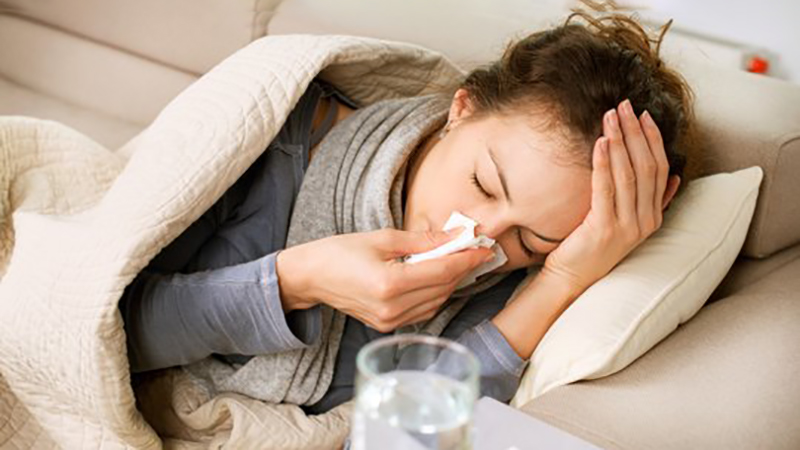

In [6]:
#@title Run me to get a slide { display-mode: "form" }
# %%capture

download()